<a href="https://colab.research.google.com/github/CrAvila/IA/blob/main/Proyecto1/Inteligencia_Artificial_Proyecto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<div>
<img src="https://drive.google.com/uc?export=download&id=1lhTXu7FShFdtXWptJH3ZOPyxOdFY8kOf" width="500"/>
</div>


## Pontificia Universidad Javeriana

#### Departamento de Ingeniería Electrónica

#### Inteligencia Artificial

## Proyecto 1

Alumnos:

**Juan Camilo Murcia Suárez**

**Carlos Roberto Ávila Hernández**

Profesor:

**Alexander Caicedo Dorado**


# Clasificación lineal: MNIST

La base de datos MNIST se considera un ejercicio clasico en el área de machine learning. Esta base de datos cuenta con un conjunto de imagenes de digitos manuscritos desde el 0 hasta el 9, la cual se encuentra en en la libreria de scikit-learn. Información sobre el dataset la pueden encontrar [aquí](http://yann.lecun.com/exdb/mnist/), mientras que una explicación sobre la función en python, especificamente la libreria sci-kit learn, pueden encontrarla [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). Está base de dato tiene imagénes de carácteres escritos desde el 0 hasta el 9. El profesor Alexander quiere que ustedes utilicen sus conocimientos en Machine Learning para resolver este problema.

## 1. Carga de Datos

Importamos la biblioteca datasets de Scikit-Learn, que contiene funciones para cargar conjuntos de datos predefinidos.

Usamos la función datasets.load_digits() para cargar el conjunto de datos de dígitos escritos a mano. Esto te proporciona un objeto que contiene las imágenes de los dígitos y las etiquetas asociadas.

In [1]:
# Se importan las librerías necesarias
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import numpy as np
import math
import random

import warnings
warnings.filterwarnings("ignore")

# Se cargan los datos
digits = load_digits()

Ahora, podemos utilizar la propiedad `DESCR` para obtener información descriptiva sobre este conjunto de datos.


In [2]:
# Se muestra la descripción de los datos
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Para poder tener una idea de como lucen estos datos, podemos observar un dígito escrito a mano. Cada observación en el conjunto de datos se compone de una matriz de píxeles en escala de grises, donde cada píxel representa un valor de intensidad. La imagen tiene una dimensión de 8x8 píxeles, lo que significa que cada observación se representa como un vector en $\mathbb{R}^{64}$ (un vector de 64 dimensiones), donde cada dimensión corresponde a un píxel en la imagen. Estos vectores en $\mathbb{R}^{64}$ se utilizan como datos de entrada para el proceso de clasificación. El objetivo principal de la clasificación es predecir a qué dígito corresponde cada imagen en función de los valores de intensidad de píxeles en estos vectores.


<Figure size 640x480 with 0 Axes>

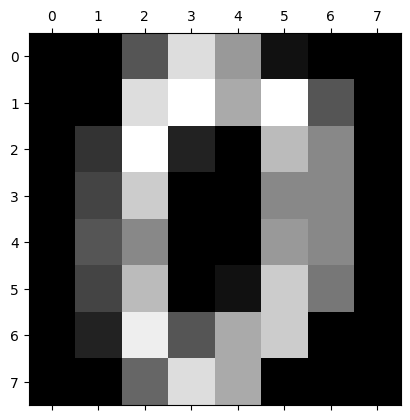

In [3]:
# Activa la escala de grises
plt.gray()

# Muestra una de las imágenes
plt.matshow(digits.images[0])
plt.show()


## 2. Análisis Descriptivo de los Datos




En esta sección, nos sumergiremos en un análisis descriptivo exhaustivo para comprender mejor la información contenida en nuestro conjunto de datos de dígitos escritos a mano. Nuestro objetivo es adquirir una visión más profunda de la naturaleza de los dígitos y sus características.

Para lograr esto, exploraremos diversas estadísticas, gráficas y datos que nos permitirán familiarizarnos con nuestra información. Esto incluirá medidas de tendencia central y dispersión para comprender las características numéricas de los datos, visualizaciones gráficas para identificar patrones y estructuras, y resúmenes descriptivos que nos ayudarán a extraer información relevante.

A través de este análisis detallado, no solo obtendremos una visión más clara de nuestros datos, sino que también estaremos mejor preparados para abordar la tarea de clasificación de los dígitos.

**Distribución de Clases:** Antes de avanzar en nuestro análisis y modelado, es esencial comprender cómo están distribuidas las diferentes clases de dígitos en nuestro conjunto de datos. Esta información nos proporciona una visión fundamental de la balanceado o desbalanceado que está el conjunto de datos en términos de la cantidad de muestras por clase.

Para visualizar esta distribución, hemos creado un gráfico de barras que muestra cuántas muestras tenemos para cada clase de dígito. Cada barra en el gráfico representa una clase, y la altura de la barra indica el número de muestras que pertenecen a esa clase.

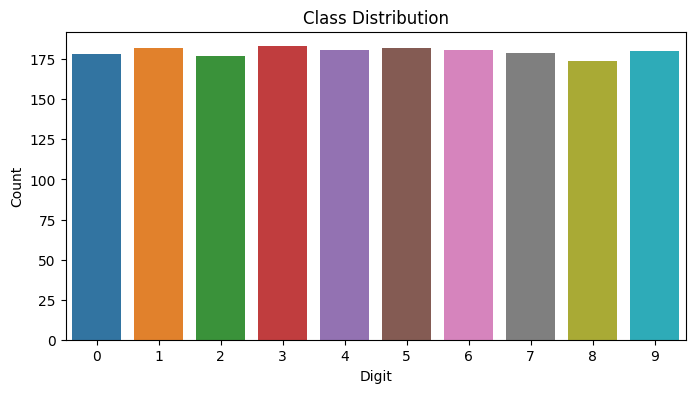

In [4]:
# Class Distribution Analysis
plt.figure(figsize=(8, 4))
sns.countplot(x='target', data=digits)
plt.title('Class Distribution')
plt.xlabel('Digit')
plt.ylabel('Count')

# Save the class distribution plot
plt.savefig('class_distribution.png')

# Show the class distribution plot
plt.show()

Al realizar la gráfica de distribución de clases, observamos que los datos están balanceados y que tienen distribuciones similares, eso es una señal positiva para el conjunto de datos. Un conjunto de datos balanceado, donde cada clase tiene una cantidad similar de muestras, a menudo es beneficioso para el entrenamiento de modelos de clasificación, ya que el modelo tiene suficientes ejemplos de cada clase para aprender patrones de manera efectiva.

**Vistazo General**: Examinaremos una selección de filas del conjunto de datos para visualizar las representaciones gráficas de algunos dígitos y obtener una comprensión inicial de las características del conjunto de datos en su totalidad.

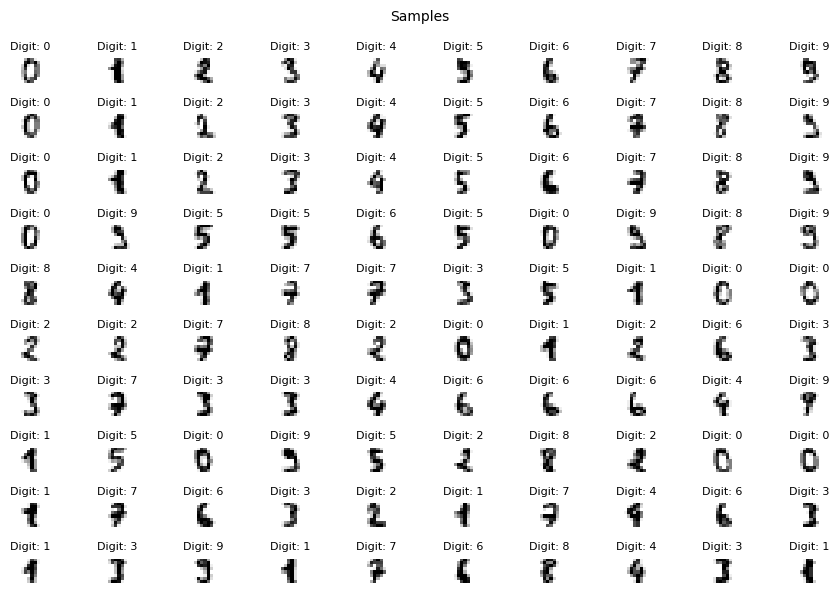

In [5]:
# Se muestran las primeras mxn imágenes de los dígitos
def show_numbers(rows, cols, data, targets, size=(8,8), suptitle = None, knn = None):
    plt.figure(figsize=(size))

    if suptitle:
        plt.suptitle(suptitle, fontsize=10)

    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)

        try:
            plt.imshow(data[i].reshape(8, 8), cmap='binary', vmin=min(data[i]), vmax=max(data[i]))
            knn_label = ('\n' + f'Model: {knn[i]}') if knn else ''
            label = str(targets[i])  + knn_label

            plt.title(f'Digit: {label}', fontsize=8, color='black')
        except:
            plt.imshow(np.array([0 for i in range(64)]).reshape(8,8), cmap = 'binary')

        plt.axis('off')



    plt.tight_layout()
    plt.show()

show_numbers(10, 10, digits.data, digits.target, (9, 6), suptitle="Samples")

**Centroides Promedio por Clase**:  A continuación, calcularemos el centroide promedio para cada clase de dígito en nuestro conjunto de datos. Esto implica determinar el valor promedio de cada píxel en todas las imágenes que pertenecen a la misma clase. Luego, graficaremos estos centroides promedio como imágenes para obtener una representación visual de cómo se ve cada clase de dígito en promedio. Esta visualización nos proporcionará información sobre las características distintivas de cada clase y nos ayudará a comprender mejor la variabilidad dentro de nuestro conjunto de datos.

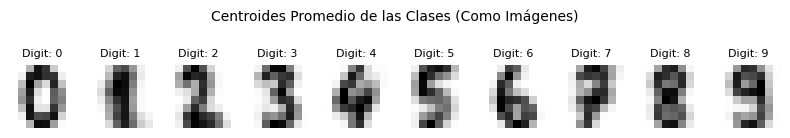

In [6]:

# Average Centroid of Classes
class_centroids = []
for digit in range(10):
    digit_data = digits.data[digits.target == digit]

    # Average centroid of each class
    class_centroid = np.mean(digit_data, axis=0)

    class_centroids.append(class_centroid)

# Convert the list of class centroids to a NumPy array
class_centroids = np.array(class_centroids)

show_numbers(1, 10, class_centroids, np.array([i for i in range(10)]), (8, 1.5), suptitle="Centroides Promedio de las Clases (Como Imágenes)")

Al graficar los centroides promedio, notamos que la representación promedio de cada clase se asemeja significativamente a cómo comúnmente escribimos los dígitos a mano. Estos centroides promedio capturan fielmente la apariencia esperada de cada dígito.

**Desviaciones Promedio por Clase**: Además de calcular los centroides promedio por clase, también vamos a calcular las desviaciones promedio para cada clase de dígito en nuestro conjunto de datos. Esto implica determinar cómo varía la intensidad de píxeles en cada región de las imágenes de una clase específica en relación con el centroide promedio de esa clase. Luego, visualizaremos estas desviaciones promedio como imágenes para identificar las regiones donde las imágenes de una clase tienden a variar más con respecto a su centroide promedio.

Esta visualización nos proporcionará información valiosa sobre las características distintivas y las variabilidades dentro de cada clase de dígito. Nos ayudará a identificar las regiones específicas de las imágenes que son más propensas a cambios o diferencias entre dígitos de la misma clase. Este conocimiento puede ser útil para mejorar la precisión de nuestro modelo de clasificación, ya que nos permitirá enfocarnos en las áreas críticas de las imágenes al realizar futuras tareas de preprocesamiento o selección de características.

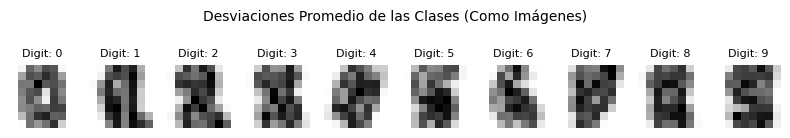

In [7]:
# Average Deviations per Class
class_deviations = []
for digit in range(10):
    digit_data = digits.data[digits.target == digit]

    # Standard deviation of each pixel within the class
    class_deviation = np.std(digit_data, axis=0)

    class_deviations.append(class_deviation)

# Convert the list of class deviations to a NumPy array
class_deviations = np.array(class_deviations)

show_numbers(1, 10, class_deviations, np.array([i for i in range(10)]), (8, 1.5), suptitle="Desviaciones Promedio de las Clases (Como Imágenes)")


Al analizar las desviaciones promedio, notamos patrones interesantes en la variabilidad de los dígitos. Observamos que las desviaciones tienden a ser más pronunciadas en los contornos de los números, donde la intensidad de píxeles es más baja, mientras que en el interior de los números, la variabilidad es menor y la intensidad de píxeles es más uniforme.

En algunos dígitos, podemos notar que la silueta del número se representa con una intensidad más baja y que alrededor de esta silueta la intensidad es mucho más oscura. Esto sugiere que la variabilidad se concentra en las regiones cercanas a los contornos, lo que podría indicar que estas áreas son más propensas a variaciones en la forma de escribir los dígitos.

Sin embargo, en los dígitos 8 y 9, observamos una variabilidad mucho más dispersa, no solo en los contornos, sino en muchas más zonas. Esto puede indicar que algunos de estos dígitos son más desafiantes de predecir, ya que muestran una variabilidad significativa en múltiples áreas de la imagen. Este conocimiento nos prepara para tratar con dígitos que pueden ser especialmente difíciles de clasificar debido a su variabilidad en diversas partes de la imagen.

**Norma Promedio de Clase:**  Vamos a calcular la norma euclidiana promedio para cada clase de dígito en nuestro conjunto de datos. Esta medida nos ayudará a entender no solo la dispersión de las imágenes de una clase en relación con su centroide promedio, sino también la intensidad de píxeles promedio utilizada y la complejidad del trazo de cada clase.

Si la norma euclidiana promedio es baja para una clase en particular, no solo indica que las imágenes de esa clase son similares entre sí, sino que también tienden a utilizar una intensidad de píxeles similar en sus trazos. Esto podría sugerir que la clase tiene una estructura más uniforme y predecible en términos de cómo se representan gráficamente los dígitos.

Por otro lado, si la norma euclidiana promedio es alta, esto podría indicar que las imágenes de esa clase son más dispersas en términos de intensidad de píxeles y trazo. Esto podría sugerir una mayor variabilidad en la forma en que se dibujan los dígitos de esa clase.

Esta información es relevante para comprender cómo se representan visualmente los dígitos en cada clase y podría influir en las estrategias de preprocesamiento o selección de características que elijamos al diseñar nuestro modelo de clasificación. Además, podría ayudarnos a identificar clases que podrían ser más desafiantes de separar debido a su mayor variabilidad visual.

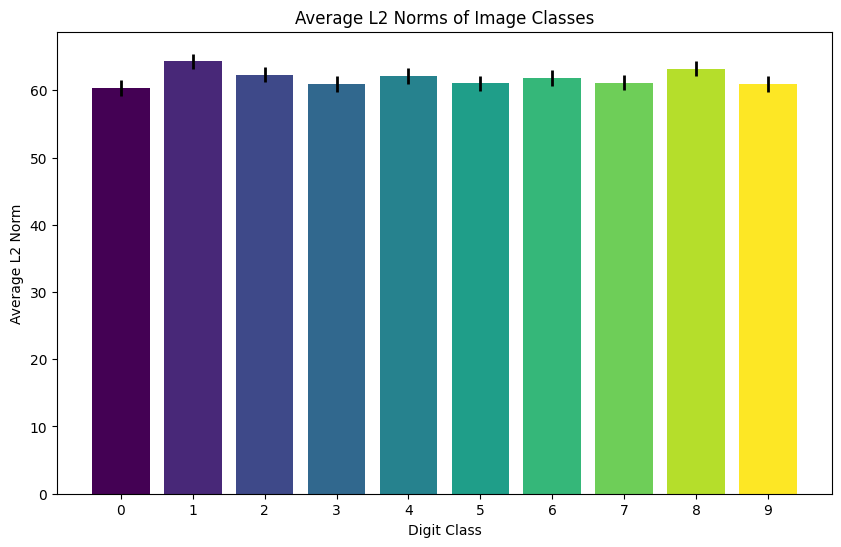

In [8]:
# Calculate class-wise average L2 norms
class_norms = []
for digit in range(10):
    digit_data = digits.data[digits.target == digit]

    # Calculate the L2 norm for each image in the class
    norms = np.linalg.norm(digit_data, axis=1)

    # Calculate the average norm for the class
    avg_norm = np.mean(norms)

    class_norms.append(avg_norm)

# Create a color map for the bars
colors = plt.get_cmap('viridis', len(class_norms))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the average L2 norms with error bars
plt.bar(range(10), class_norms, tick_label=list(range(10)), color=colors(range(10)))
plt.errorbar(range(10), class_norms, yerr=np.std(class_norms), fmt='none', ecolor='black', elinewidth=2)

# Customize the plot
plt.title('Average L2 Norms of Image Classes')
plt.xlabel('Digit Class')
plt.ylabel('Average L2 Norm')
plt.xticks(range(10))

# Show the plot
plt.show()


Al analizar las desviaciones promedio, notamos patrones interesantes en la variabilidad de los dígitos. Observamos que las desviaciones tienden a ser más pronunciadas en los contornos de los números, donde la intensidad de píxeles es más baja, mientras que en el interior de los números, la variabilidad es menor y la intensidad de píxeles es más uniforme.

En algunos dígitos, podemos notar que la silueta del número se representa con una intensidad más baja y que alrededor de esta silueta la intensidad es mucho más oscura. Esto sugiere que la variabilidad se concentra en las regiones cercanas a los contornos, lo que podría indicar que estas áreas son más propensas a variaciones en la forma de escribir los dígitos.

Sin embargo, en los dígitos 8 y 9, observamos una variabilidad mucho más dispersa, no solo en los contornos, sino en muchas más zonas. Esto puede indicar que algunos de estos dígitos son más desafiantes de predecir, ya que muestran una variabilidad significativa en múltiples áreas de la imagen. Este conocimiento nos prepara para tratar con dígitos que pueden ser especialmente difíciles de clasificar debido a su variabilidad en diversas partes de la imagen.

**Norma $L_1$ Promedio por Clase:**A continuación, vamos a calcular la norma L1 promedio para cada clase de dígito en nuestro conjunto de datos. La norma L1 es una medida que cuantifica la distancia entre dos puntos en un espacio vectorial utilizando la suma de las diferencias absolutas entre sus componentes.

El cálculo de la norma L1 promedio nos permitirá comprender la dispersión y la intensidad de píxeles utilizada en cada clase de dígito de manera similar a la norma euclidiana promedio. Sin embargo, la norma L1 puede proporcionar una perspectiva diferente, ya que enfatiza las diferencias absolutas en lugar de las diferencias cuadráticas.

Esto podría ser útil para identificar patrones específicos de intensidad de píxeles en las imágenes de cada clase. Si la norma L1 promedio es baja para una clase, sugiere que las imágenes de esa clase tienden a ser similares en términos de intensidad de píxeles, pero también que las diferencias en intensidad se pueden describir mediante valores absolutos bajos. Esto podría indicar una consistencia en la intensidad de píxeles y trazos en la representación de esa clase.

Por otro lado, si la norma L1 promedio es alta, podría sugerir una mayor variabilidad en la intensidad de píxeles y en cómo se dibujan los dígitos de esa clase. Esto podría ayudarnos a identificar clases que presenten desafíos específicos en términos de su variabilidad de intensidad y trazo.

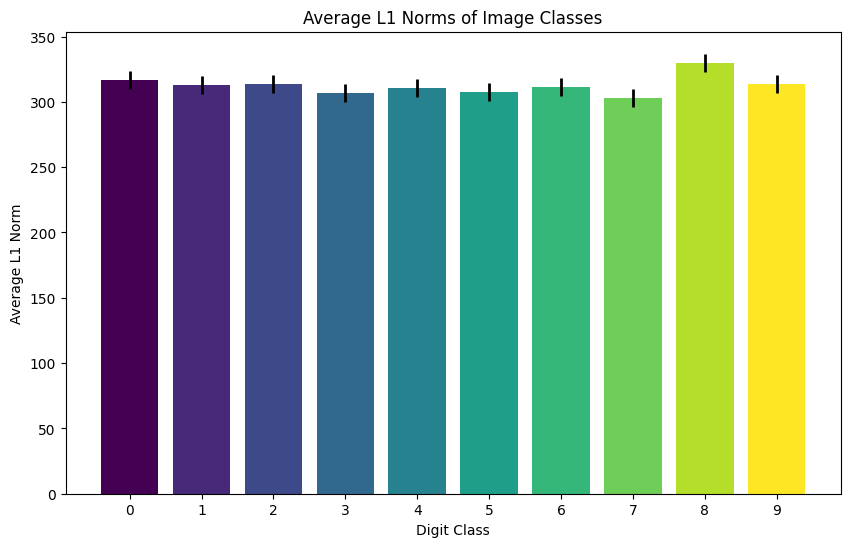

In [9]:
# Calculate class-wise average L1 norms
class_norms_l1 = []
for digit in range(10):
    digit_data = digits.data[digits.target == digit]

    # Calculate the L1 norm for each image in the class
    norms_l1 = np.linalg.norm(digit_data, ord=1, axis=1)

    # Calculate the average L1 norm for the class
    avg_norm_l1 = np.mean(norms_l1)

    class_norms_l1.append(avg_norm_l1)

# Create a color map for the bars
colors = plt.get_cmap('viridis', len(class_norms_l1))

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the average L1 norms with error bars
plt.bar(range(10), class_norms_l1, tick_label=list(range(10)), color=colors(range(10)))
plt.errorbar(range(10), class_norms_l1, yerr=np.std(class_norms_l1), fmt='none', ecolor='black', elinewidth=2)

# Customize the plot
plt.title('Average L1 Norms of Image Classes')
plt.xlabel('Digit Class')
plt.ylabel('Average L1 Norm')
plt.xticks(range(10))

# Show the plot
plt.show()


En este contexto, observamos que el dígito 8 tiene el valor de norma L1 promedio más alto, seguido por el dígito 9 y el dígito 0.

Un valor de norma L1 promedio alto para el dígito 8 sugiere que las imágenes de este dígito tienden a ser más diversas en términos de la intensidad de píxeles y la forma en que se representan. Esto podría indicar que el dígito 8 puede escribirse de varias maneras distintas y, por lo tanto, presenta una mayor variabilidad en su apariencia.El dígito 9 también muestra un valor de norma L1 promedio alto, lo que sugiere una variabilidad considerable en la intensidad de píxeles y la forma en que se representa. Esto podría indicar que el dígito 9 puede ser difícil de predecir debido a las múltiples formas en que puede escribirse.Aunque el dígito 0 tiene un valor de norma L1 promedio más bajo en comparación con el 8 y el 9, aún se encuentra entre los más altos en la medida. Esto sugiere que, aunque el dígito 0 puede ser un poco más consistente en su representación que el 8 y el 9, todavía presenta cierta variabilidad en la forma en que se escribe.

**Uso de las Intensidades**: En la siguiente gráfica, hemos realizado una visualización de los valores de píxeles en cada clase de dígito.

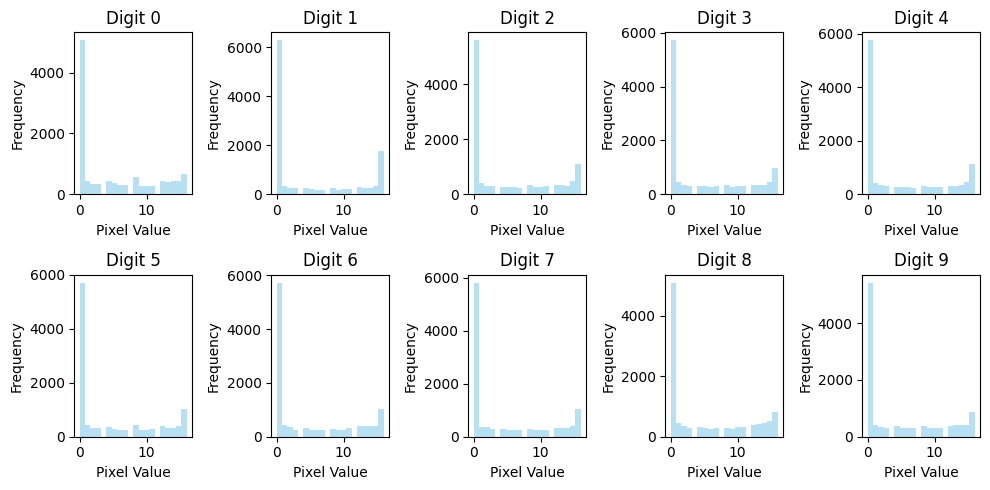

In [10]:
# Summary Statistics
mean_pixel_values = np.mean(digits.data, axis=0)
std_pixel_values = np.std(digits.data, axis=0)

# Data Visualization
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    digit_data = digits.data[digits.target == i]
    plt.hist(digit_data.ravel(), bins=20, color='skyblue', alpha=0.6)
    plt.title(f'Digit {i}')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
plt.tight_layout()

# Save the data visualization plot
plt.savefig('data_visualization.png')

# Show the data visualization plot
plt.show()

Cada subgráfico representa un dígito específico, del 0 al 9, y muestra la distribución de los valores de píxeles en ese dígito en particular. Los resultados de esta visualización revelan patrones interesantes en la intensidad de píxeles utilizada en las representaciones de cada dígito. Por ejemplo, notamos que en la clase del dígito 0, el valor del píxel más común es el cero, lo que sugiere una presencia dominante de áreas en blanco en las imágenes de este dígito. Además, para el dígito 1, observamos un uso significativo de la intensidad máxima y pocos valores de píxeles de baja intensidad. Estas observaciones proporcionan información valiosa sobre las características distintivas de cada dígito y cómo se representan visualmente, lo que puede influir en las estrategias de procesamiento y modelado de datos posteriores.

**Matriz de Correlación:** La matriz de correlación es una herramienta fundamental en el análisis de datos que nos permite examinar las relaciones y dependencias entre variables. En el contexto de nuestro conjunto de datos de dígitos escritos a mano, hemos calculado la matriz de correlación para comprender cómo se relacionan los píxeles de las imágenes entre sí. Esta matriz nos proporciona información valiosa sobre si la intensidad de un píxel está relacionada de alguna manera con la intensidad de otros píxeles en las imágenes. A través de esta exploración, buscamos identificar patrones de correlación que podrían influir en el proceso de clasificación de los dígitos.

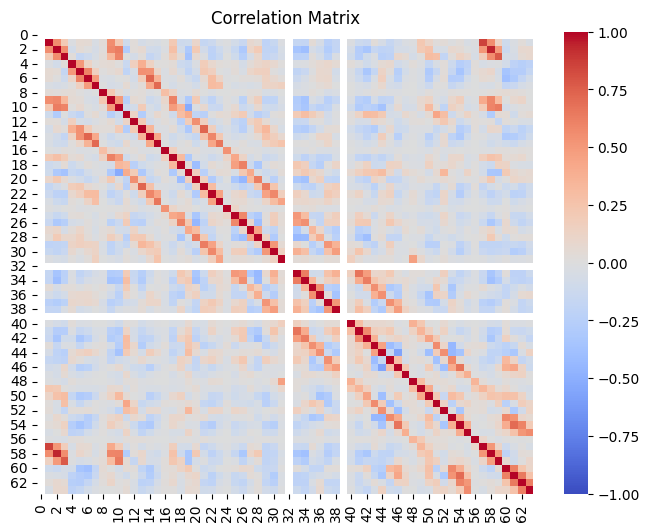

In [11]:
# Correlation Analysis
correlation_matrix = np.corrcoef(digits.data, rowvar=False)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, annot=False)
plt.title('Correlation Matrix')

# Save the correlation analysis plot
plt.savefig('correlation_analysis.png')

# Show the correlation analysis plot
plt.show()

Tras analizar la matriz de correlación de nuestro conjunto de datos de dígitos escritos a mano, hemos observado diversas relaciones entre los píxeles de las imágenes. En general, notamos que algunos píxeles están altamente correlacionados entre sí, lo que sugiere que su intensidad tiende a variar juntos en las imágenes. Esta información puede ser útil al diseñar estrategias de preprocesamiento y selección de características, ya que nos permite identificar áreas de las imágenes que pueden ser redundantes en términos de información. Además, el análisis de la matriz de correlación nos ayuda a comprender mejor cómo se estructuran los dígitos en términos de la intensidad de píxeles y puede ser relevante para el desarrollo de futuros modelos de clasificación. En última instancia, la matriz de correlación es una herramienta esencial en nuestro proceso de análisis de datos que contribuye a nuestra comprensión de las relaciones entre variables y nos guía en la toma de decisiones informadas en la creación de modelos de aprendizaje automático.

## 3. Clasificador K-Nearest Neighbors

#### **Implementación desde Cero**

A continuación, se desarrollará un clasificador KNN desde cero, partiendo desde una matriz que contenga todos nuestros datos incluyendo la salida.

In [12]:
# Datos X
X = digits.data

# Labels
y = digits.target

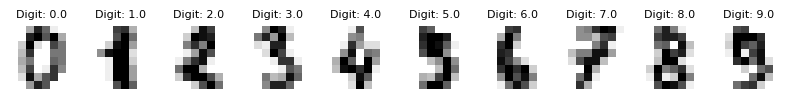

In [13]:
# Matriz aumentada (inlucyendo los datos de salida)
Xa = np.column_stack((np.array(X), y))

show_numbers(1, 10, Xa[:, :-1], Xa[:, -1])

Supongamos que tenemos $m$ elementos en $\mathbb{R}^{n}$, con:

$$\mathbf{x}^{(i)}=\left[\begin{array}{c}
    x_1^{(i)} \\
    x_2^{(i)} \\
    \vdots \\
    x_n^{(i)} \\
\end{array}\right] \in \mathbb{R}^{n}
$$

Donde cada $\mathbf{x}^{(i)}$ tiene su correspondiente salida $y^{(i)}$ y $y^{(i)} \in C = \{0,1,2, \dots, c\}$ con $c$ siendo el número total de clases.

Podemos agrupar dichos elementos en una matriz $\mathbf{D}$. Esta matriz contiene cada uno de los vectores y está aumentada para contener sus respectivas salidas:

$$\mathbf{D} = \left[\begin{array}{c|c}
    \left(\mathbf{x}^{(1)}\right)^T & y^{(1)} \\
    \left(\mathbf{x}^{(2)}\right)^T & y^{(2)} \\
    \vdots & \vdots \\
    \left(\mathbf{x}^{(m)}\right)^T & y^{(m)} \\
\end{array}\right]
$$

$$
\mathbf{D} = \left[\begin{array}{ccccc|c}
    x_{1}^{(1)} & x_{2}^{(1)} & x_{3}^{(1)} & \ldots & x_{n}^{(1)} & y^{(1)} \\
    x_{1}^{(2)} & x_{2}^{(2)} & x_{3}^{(2)} & \ldots & x_{n}^{(2)} & y^{(2)} \\
    \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
    x_{1}^{(m)} & x_{2}^{(m)} & x_{3}^{(m)} & \ldots & x_{n}^{(m)} & y^{(m)} \\
\end{array}\right]
$$

In [14]:
# Se convierte la matriz a una lista normal de Python
Xa = Xa.tolist()

print(f"\nDimensiones: {len(Xa)} x {len(Xa[0])}")


Dimensiones: 1797 x 65


Ahora, seperaremos los datos para crear los conjuntos de entrenamiento y de prueba.

In [15]:
def separate_set(set, proportion):
    # Se mezclan los datos
    random.shuffle(set)

    # Total de datos
    n = len(set)

    # Datos para el conjunto de entrenamiento
    training_n = math.ceil(len(set)*proportion/100)

    # Datos para el conjunto de prueba
    test_n = n - training_n

    training_set = set[0: training_n]
    test_set = set[training_n::]

    return training_set, test_set

In [16]:
training_data, test_data = separate_set(Xa, 80)

print(f"Total de datos de Entrnamiento: {len(training_data)}")
print(f"Total de Datos de Prueba {len(test_data)}")

Total de datos de Entrnamiento: 1438
Total de Datos de Prueba 359


**Normalización:** Se normalizará cada variable de los datos de entrenamiento por medio de la normalización min-max, de la siguiente manera:

$$ X_{\text{norm}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} $$

Donde:
- $X_{\text{norm}}$ es el valor normalizado.
- $X$ es el valor original de la variable.
- $X_{\text{min}}$ es el valor mínimo de la variable en el conjunto de datos de entrenamiento.
- $X_{\text{max}}$ es el valor máximo de la variable en el conjunto de datos de entrenamiento.

In [17]:
def transpose_data(data):
    num_rows = len(data)
    num_cols = len(data[0])
    return [[data[j][i] for j in range(num_rows)] for i in range(num_cols)]

def normalize_column(column):
    x_min = min(column)
    x_max = max(column)
    r = x_max - x_min if x_max - x_min != 0 else 1
    return [(x - x_min) / r for x in column]

def normalize_data(data):
    num_rows = len(data)
    num_cols = len(data[0])

    # Transpose the input data
    t_data = transpose_data(data)

    # Initialize lists for storing min and max values
    min_values = [min(col) for col in t_data[:-1]]
    max_values = [max(col) for col in t_data[:-1]]

    normalized_t_data = [normalize_column(col) for col in t_data[:-1]]

    # Append the last column as integers
    normalized_t_data.append([int(x) for x in t_data[-1]])

    # Transpose the normalized data back to its original shape
    normalized_data = transpose_data(normalized_t_data)

    return normalized_data, min_values, max_values


In [18]:
def normalize_single_observation(observation, min_values, max_values):
    normalized_observation = []

    for x, x_min, x_max in zip(observation, min_values, max_values):
        r = x_max - x_min if x_max - x_min != 0 else 1
        x_norm = (x - x_min) / r
        normalized_observation.append(x_norm)

    normalized_observation.append(observation[-1])

    return normalized_observation


In [19]:
training_data, training_mins, training_maxs = normalize_data(training_data)

test_data = [normalize_single_observation(x, training_mins, training_maxs) for x in test_data]

Para implementar el clasificador, podemos tomar en cuenta distintos tipos de métricas. A continuación, se crea la función que retorna la distancia $L_p$ entre dos vectores $x_i^{(1)}, x_i^{(2)} \in \mathbb{R}^n$, definida de la siguiente manera:

$$L_p = \left[ \sum_{i=1}^n \left| x_i^{(1)} - x_i^{(2)} \right|^p \right]^{\frac{1}{p}}$$

In [20]:
def lp_distance(a, b, p):

    # Se verifica que los vectores sean de la misma dimensión
    if len(a) != len(b):
        print("Vectors must have the same dimensions.")
        return

    if p == "inf":
        diff_vector = []
        for i in range(len(a)):
            diff_vector.append( abs( a[i] - b[i] ) )

        return max(diff_vector)

    # Se suman las potencias p de las diferencias en las dimensiones
    s = 0

    for i in range(len(a)):
        s += math.pow( abs(a[i] - b[i]), p)

    # Se obtiene la raíz p-ésima de la suma
    d = math.pow(s, 1/p)

    return d

A continuación se muestra un ejemplo con la distancia Manhattan, Euclídea y Media de los vectores:

$$\mathbf{a} = [1.1, 2.2, 3.3] , \quad \mathbf{b} = [4.4, 5.5, 6.6]$$

In [21]:
a = [1.1, 2.2, 3.3]
b = [4.4, 5.5, 6.6]

print(f"Distancia Manhattan (p = 1): {lp_distance(a, b, 1)}")
print(f"Distancia Media (p = 1.5): {lp_distance(a, b, 1.5)}")
print(f"Distancia Euclídea (p = 2): {lp_distance(a, b, 2)}")
print(f"Distancia L_inf (p = oo): {lp_distance(a, b, 'inf')}")

Distancia Manhattan (p = 1): 9.899999999999999
Distancia Media (p = 1.5): 6.864276616071283
Distancia Euclídea (p = 2): 5.715767664977295
Distancia L_inf (p = oo): 3.3000000000000003


In [22]:
def classify(entry, data, k, metric):

    # Se crea una lista donde se guarda la distancia del input con cada dato y su respectiva clase
    distances_list = [ {"distance": lp_distance(v[:-1], entry, metric), "class": v[-1]} for v in data]

    # Se ordena el diccionario respecto a las distancias
    distances_list = sorted(distances_list, key= lambda x: x['distance'])

    # Se toman en cuenta los primeros k vecinos
    neighbors = distances_list[:k]

    # Se toman las clases de los vecinos
    neighbor_classes = [n["class"] for n in neighbors]

    # Se cuentan las ocurrencias de cada clase en los vecinos
    neighbors_count = {}

    for nc in neighbor_classes:
        if nc in neighbors_count:
            neighbors_count[nc] += 1
        else:
            neighbors_count[nc] = 1

    # Se selecciona la clase con mayor ocurrencias
    max_class = max(neighbors_count.values())
    max_class_neighbors = [neighbor for neighbor, occurrences in neighbors_count.items() if occurrences == max_class]
    prediction = random.choice(max_class_neighbors)

    return prediction

Con esto ya podemos realizar clasificaciones individuales introduciendo los datos de una observación. A continuación, se extraerá al azar un dato del conjunto de prueba:

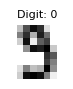

Dígito real: 9


In [23]:
# Se extrae un dato al azar
sample = random.choice(test_data)

sample = normalize_single_observation(sample, training_mins, training_maxs)

individual_test = classify(sample[:-1], training_data, 5, 2)

def show_number(number, label, size=(1,1)):
    show_numbers(1, 1, [np.array(number)], [int(label)], size)

show_number(sample[:-1], individual_test)

print(f"Dígito real: {int(sample[-1])}")

Ahora, se procederá a evaluar todo el conjunto de prueba y separar las clasificaciones correctas de las incorrectas.

In [24]:
def evaluate_knn_classifier(training_set, test_set, k, metric):
    correct_predictions = []
    incorrect_predictions = []

    for observation in test_data:

        # Clase real de la observación
        real_digit = observation[-1]

        # Vector de observación
        digit_data = observation[:-1]

        # Predicción del modelo
        prediction = classify(digit_data, training_set, k, metric)

        if prediction == real_digit:
            correct_predictions.append(observation)
        else:
            incorrect_predictions.append( { "data": observation, "prediction" : prediction })

    return correct_predictions, incorrect_predictions

Para esta evaluación, se utilizarán $k = 5$ vecinos y la distancia $L_2$:

In [25]:
correct_predictions, incorrect_predictions = evaluate_knn_classifier(training_data, test_data, 5, 2)


Classifier Results:

Total Predictions: 359
Correct Predictions: 350
Incorrect Predictions: 9
Accuracy: 97.49%



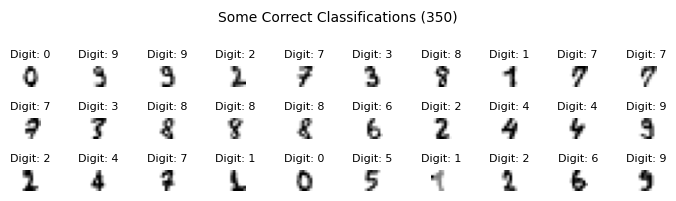

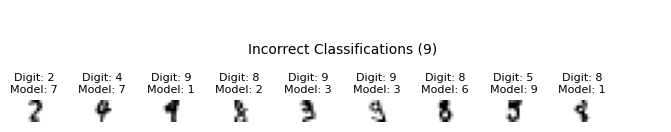

In [26]:
def display_classifier_results(correct_predictions, incorrect_predictions):
    total_predictions = len(correct_predictions) + len(incorrect_predictions)
    accuracy = len(correct_predictions) / total_predictions

    print("\nClassifier Results:\n")
    print(f"Total Predictions: {total_predictions}")
    print(f"Correct Predictions: {len(correct_predictions)}")
    print(f"Incorrect Predictions: {len(incorrect_predictions)}")
    print(f"Accuracy: {accuracy:.2%}")
    print("")

    # Se muestran algunos datos correctos
    cp_data = [c[:-1] for c in correct_predictions]
    cp_targets = [c[-1] for c in correct_predictions]
    l = f"Some Correct Classifications ({len(cp_data)})"
    show_numbers(3, 10, np.array(cp_data), np.array([int(t) for t in cp_targets]), (7,2), l)


    # Se muestran los datos clasificados erroneamente
    icp_data = [c["data"][:-1] for c in incorrect_predictions]
    icp_targets = [c["data"][-1] for c in incorrect_predictions]
    icp_predictions = [c["prediction"] for c in incorrect_predictions]
    l = f"\n\nIncorrect Classifications ({len(icp_data)})\n"
    show_numbers(1, 10, np.array(icp_data), np.array([int(t) for t in icp_targets]), (7,1.3), l, icp_predictions)

display_classifier_results(correct_predictions, incorrect_predictions)

 ### Rendimiento del Clasificador según $k$

La exploración de valores de $k$ en el algoritmo KNN generalmente se limita hasta la raíz cuadrada del número total de datos de entrenamiento (denominado $n$). Esta elección equilibra la eficiencia computacional al evitar cálculos excesivos de distancias con la necesidad de capturar patrones locales en los datos. Limitar $k$ de esta manera evita problemas de sobreajuste y se basa en la Ley de los Grandes Números, que sugiere que en conjuntos de datos grandes, no es necesario considerar todos los datos para obtener estimaciones confiables. Para encontrar el valor óptimo de $k$, es común realizar una búsqueda dentro de este rango y utilizar técnicas de validación cruzada para evaluar el rendimiento del modelo.

A continuación, evaluaremos el rendimiento del clasificador en función de diferentes valores de $k$ y la métrica utilizada para medir la distancia.

Además, se trabajará con los datos normalizados. La normalización es beneficiosa en este contexto, ya que ayuda a mantener la coherencia y la equidad en las comparaciones entre distintas métricas y valores de $k$. Al escalarse los datos a una escala común, aseguramos que todas las características contribuyan de manera equitativa en la medición de distancias, lo que puede mejorar la robustez y la interpretabilidad de los resultados obtenidos en nuestra evaluación.

**Para nuestra implementación desde cero:**

In [27]:

# Function to evaluate KNN classifier with different metrics
def evaluate_knn_metrics(training_data, test_data, k_values, metrics):
    accuracy_scores = []
    metric_labels = []

    for metric_name, metric_value in metrics.items():
        accuracy_scores_metric = []

        for k in k_values:
            correct_predictions, incorrect_predictions = evaluate_knn_classifier(training_data, test_data, k, metric_value)
            accuracy = len(correct_predictions) / (len(correct_predictions) + len(incorrect_predictions))
            accuracy_scores_metric.append(accuracy)

        accuracy_scores.append(accuracy_scores_metric)
        metric_labels.append(metric_name)

    return accuracy_scores, metric_labels

# Function to plot accuracy scores for different metrics
def plot_accuracy_vs_k(k_values, accuracy_scores, metric_labels):
    sns.set_theme()
    plt.figure(figsize=(12, 5))

    for i, metric_label in enumerate(metric_labels):
        plt.plot(k_values, accuracy_scores[i], marker='o', label=metric_label)

    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. k for KNN Classifier with Different Metrics')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Define the metrics and their corresponding values
metrics = {
    'Manhattan': 1,
    'Minkowski (p=1.5)': 1.5,
    'Euclidean': 2,
    'L_inf': "inf"
}

# Define the range of k values
k_values = [x for x in range(1, int(len(training_data) ** 0.5) + 1) if x%2 == 1]

# Evaluate accuracy scores for different metrics
accuracy_scores, metric_labels = evaluate_knn_metrics(training_data, test_data, k_values, metrics)

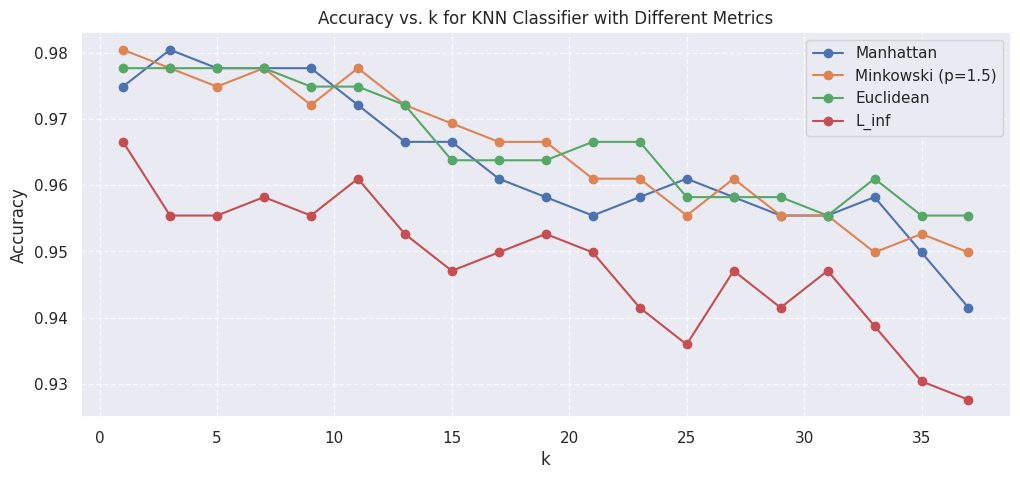

In [28]:
# Plot accuracy scores
plot_accuracy_vs_k(k_values, accuracy_scores, metric_labels)

In [29]:
def plot_box_plot(accuracy_scores, metric_labels):
    plt.figure(figsize=(12, 6))
    plt.boxplot(accuracy_scores, labels=metric_labels)
    plt.xlabel('Metrics')
    plt.ylabel('Accuracy')
    plt.title('Box Plot of Accuracy for Different Metrics')
    plt.show()

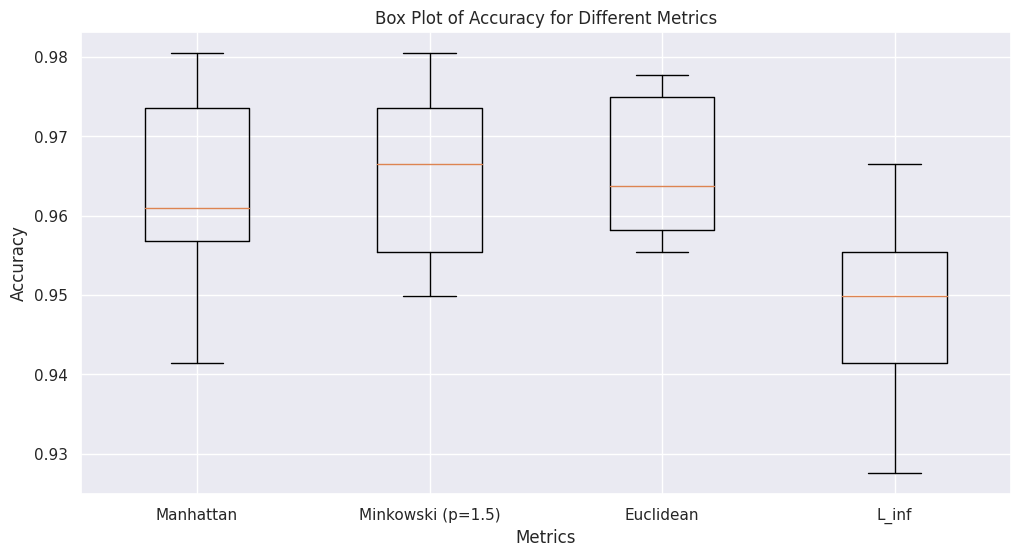

In [30]:
plot_box_plot(accuracy_scores, metric_labels)

**Para KNN con SciKitLearn:**

In [31]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_convert_data(training_data, test_data):
    training_data = np.array(training_data)
    test_data = np.array(test_data)
    return training_data, test_data

def calculate_accuracy_scores(training_data, test_data):
    k_values = list(range(1, int(len(training_data) ** 0.5) + 1))

    metrics = {
        'Manhattan': 'manhattan',
        'Minkowski (p=1.5)': 1.5,
        'Euclidean': 'euclidean',
        'L_inf': 'chebyshev',
    }

    accuracy_scores = {metric_name: [] for metric_name in metrics}

    for metric_name, metric_identifier in metrics.items():
        accuracy_scores_metric = []

        for k in k_values:
            if metric_identifier == 1.5:
                knn_classifier = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1.5)
            else:
                knn_classifier = KNeighborsClassifier(n_neighbors=k, metric=metric_identifier)

            knn_classifier.fit(training_data[:, :-1], training_data[:, -1])
            y_pred = knn_classifier.predict(test_data[:, :-1])
            accuracy = accuracy_score(test_data[:, -1], y_pred)
            accuracy_scores_metric.append(accuracy)

        accuracy_scores[metric_name] = accuracy_scores_metric

    return k_values, accuracy_scores

def plot_accuracy_vs_k(k_values, accuracy_scores):
    sns.set_theme()
    plt.figure(figsize=(12, 5))

    for metric_name, accuracy_scores_metric in accuracy_scores.items():
        plt.plot(k_values, accuracy_scores_metric, marker='o', label=metric_name)

    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs. k for KNN Classifier with Different Metrics')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

def plot_box_plot(accuracy_scores, metric_labels):
    plt.figure(figsize=(12, 6))
    plt.boxplot(list(accuracy_scores.values()), labels=metric_labels)
    plt.xlabel('Metrics')
    plt.ylabel('Accuracy')
    plt.title('Box Plot of Accuracy for Different Metrics')
    plt.show()

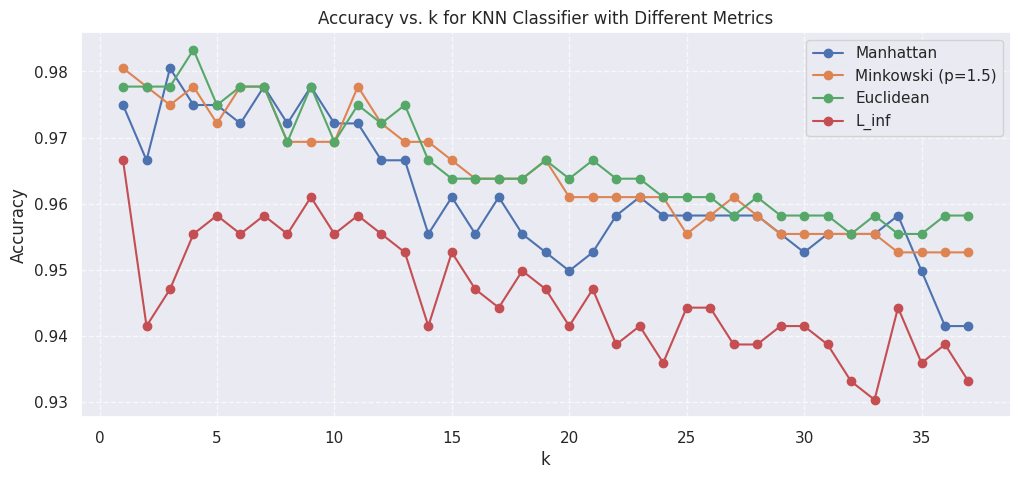

In [38]:
# Plot accuracy vs. k
k_values, accuracy_scores = calculate_accuracy_scores(np.array(training_data), np.array(test_data))
plot_accuracy_vs_k(k_values, accuracy_scores)

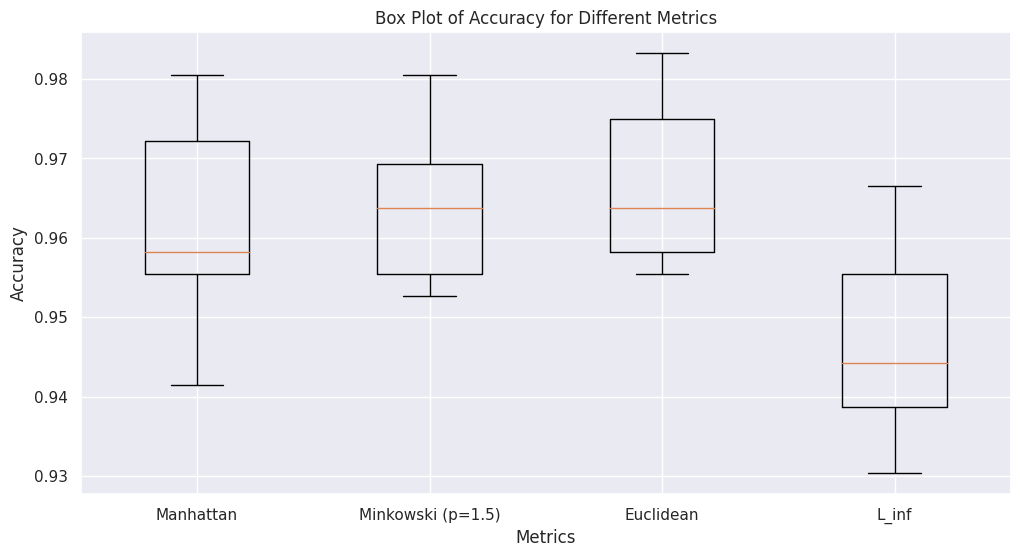

In [39]:
# Plot box plot
plot_box_plot(accuracy_scores, list(metrics.keys()))

Durante las pruebas realizadas, se observa que la norma euclidiana muestra una mayor estabilidad y mejores resultados en general. Esto sugiere que la métrica euclidiana es una buena opción para este conjunto de datos y problema.

Por otro lado, la norma $L_{\infty}$ siempre obtiene peores resultados, lo que puede indicar que esta métrica no se adapta bien a los patrones presentes en los datos, al menos de manera relativa ya que a pesar de siempre obtener una precisión de casi el $95 \%$, siempre se posiciona por detrás de las otras métricas.

Las métricas de Manhattan y Minkowski con p=1.5 se encuentran en un punto intermedio, lo que sugiere que pueden ser opciones viables en situaciones donde la métrica euclidiana no sea la mejor elección. Además, la métrica Manhattan muestra más variabilidad en sus resultados.

Es importante destacar que las diferencias entre los clasificadores (el implementado desde cero y el de sklearn) pueden deberse a los criterios de desempate y a que el algoritmo de sklearn utiliza optimizaciones, como estructuras de datos tipo árbol, para evitar calcular cada distancia nuevamente. Esto explica la diferencia en velocidad entre ambos enfoques.



## 4. Regresión Logística

Para este clasificador, asumiremos que nuestro modelo tiene la forma:

$$h_{\boldsymbol\theta}(\mathbf{x}) = g(\boldsymbol\theta^{\text{T}}\mathbf{x}),$$

donde $g(\displaystyle\mathbf{z})=\frac{1}{1+e^{-\mathbf{z}}}$ es una función sigmoidal o logística. Por lo tanto la forma del modelo es:

$$h_{\boldsymbol\theta}(\mathbf{x}) = \frac{1}{1+e^{-\boldsymbol\theta^{\text{T}}\mathbf{x}}}.$$

In [40]:
def h_theta(theta, x):
    h = 1 / (1 + np.exp(-theta.T @ x))
    return h

Sea nuestro vector $\mathbf{x}^{(i)} = [x_0^{(i)};x_1^{(i)};\ldots;x_n^{(i)}]$, con $x_0^{(i)} = 1$, para todo $i$, y $\mathbf{x}^{(i)} \in \mathbb{R}^{n+1}$ y $y\in\{0,1\}$. Dado el set de entrenamiento como se encuentran los parámetros $\boldsymbol\theta$.

Definamos la función de costo para nuestra regresión:

$$\mathbf{J}(\boldsymbol\theta) = \frac{1}{m}\sum_{i=1}^{m}\text{costo}(h_{\boldsymbol\theta}(\mathbf{x}^{(i)}),y^{(i)}),$$

donde  $$ \text{costo}(h_\boldsymbol\theta(\mathbf{x}^{(i)}),y^{(i)}) = -y^{(i)}\log(h_\boldsymbol\theta(\mathbf{x}^{(i)}))-(1-y^{(i)})\log(1-h_\boldsymbol\theta(\mathbf{x}^{(i)})).$$

 $$\mathbf{J}(\boldsymbol\theta) = -\frac{1}{m}\left(\sum_{i=1}^{m}y^{(i)}\log(h_\boldsymbol\theta(\mathbf{x}^{(i)}))+(1-y^{(i)})\log(1-h_\boldsymbol\theta(\mathbf{x}^{(i)}))\right).$$

 Y con Regularización:

  $$\mathbf{J}(\boldsymbol\theta) = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(h_\boldsymbol\theta(\mathbf{x}^{(i)}))+(1-y^{(i)})\log(1-h_\boldsymbol\theta(\mathbf{x}^{(i)}))+\frac{\gamma}{2m}\sum_{j=1}^n\theta_j^2.$$

Lo único que queda por hacer es encontrar los parámetros $\boldsymbol\theta$ que minimizan esa función de costo. Para hacer esto se utiliza gradient descent.

In [41]:
def J(theta, h_theta, y, reg):
    m = len(y)
    J = -(1/m) * sum([yi * np.log(hxi) + (1-yi) * np.log(1 - hxi) for yi, hxi in zip(y, h_theta)]) + (reg/(2*m)) * sum([t**2 for t in theta[1:]])
    return J


El gradiente: $$\frac{\partial\mathbf{J}(\boldsymbol\theta)}{\partial\theta_j} = \frac{1}{m}\sum_{i=1}^m\left(h_\boldsymbol\theta(\mathbf{x}^{(i)})-y^{(i)}\right)x_j^{(i)}$$

</div>

Con Regularización:

$$\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) x^{(i)}_0$$

$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)}) x^{(i)}_j + \frac{\lambda}{m} \theta_j$$


In [42]:
def gradient(x, theta, h_theta, y, reg):
    m = len(y)
    gradient_without_reg = (1 / m) * x.T @ (h_theta - y)
    regularization_term = (reg / m) * theta
    dj = gradient_without_reg + regularization_term
    return dj

Así, la regla de actualización de los pesos en gradient descent, par ala regresión logistica, esta dada por:

$$ \begin{equation}
      \theta_n := \theta_n-\alpha\frac{1}{m}\sum_{i=1}^{m}\left[h_\boldsymbol\theta(\mathbf{x}^{(i)})-y^{(i)}\right]x_n^{(i)}\\
   \end{equation}$$
   
Donde $x_0^{(i)}= 1$ para todo $i$. aunque luce identico al gradiente descendiente para regresión lineal, no lo es, ya que la función $h_\boldsymbol\theta(\mathbf{x})$ es diferente a la función de regresión lineal.


Y con Regularización:

$$ \begin{equation}
\begin{split}
    \theta_0&:=& \theta_0-\alpha\left[\frac{1}{m}\sum_{i=1}^{m}\left[h_\boldsymbol\theta(\mathbf{x}^{(i)})-y^{(i)}\right]x_0^{(i)}\right]\\
\theta_j &:=& \theta_n-\alpha\left[\frac{1}{m}\sum_{i=1}^{m}\left[h_\boldsymbol\theta(\mathbf{x}^{(i)})-y^{(i)}\right]x_j^{(i)}+\frac{\gamma}{m}\theta_j\right]\\
\end{split}
\end{equation}$$

con $j={1,\ldots,n}$. Donde el modelo $h_\boldsymbol\theta(\mathbf{x})$ es la función logistica y $x_0^{(i)}=1$.

In [43]:
def update_theta(theta, eta, A, h_theta, y, reg):
    m = len(y)
    gradient_term = (1/m) * A.T @ (h_theta - y)
    regularization_term = (reg/m) * theta
    theta = theta - eta * (gradient_term + regularization_term)
    return theta


La normalización Mín-Máx, también conocida como escalado de características, es una técnica de preprocesamiento de datos utilizada para transformar datos numéricos en un rango específico, normalmente [0, 1]. Se consigue mediante la siguiente fórmula:

$$x' = \frac{x - \text{min}_i}{\text{max}_i - \text{min}_i}$$

Donde:
- $x'$ es el valor normalizado de $x$.
- $x$ es el dato original.
- $\text{min}_i$ es el valor mínimo de la característica $i$.
- $\text{max}_i$ es el valor máximo de la característica $i$.

La fórmula resta el valor mínimo $\text{min}_i$ del valor original $x$ para llevarlo a una escala relativa a partir de 0. A continuación, se divide por el rango de valores $\text{max}_i - \text{min}_i$ para escalarlo entre $0$ y $1$.

Esta técnica de normalización es útil para garantizar que las diferentes características con diferentes escalas tienen un impacto coherente en los algoritmos de aprendizaje automático.

In [44]:
def normalize_data(col):
    # Normalize the data
    min_val = min(col)
    max_val = max(col)
    denominator = max_val - min_val if max_val != min_val else 1.0

    normalized_data = (col - min_val) / denominator
    return normalized_data, min_val, max_val


El problema es que ahora el modelo está entrenado con datos normalizados y para utilizarlo, tendríamos que normalizar cada dato de entrada. Al hacerlo y expandir este resultado, obtendríamos lo siguiente:

$$ \hat{y} = \theta_0' + \sum_{i=i}^n \theta_i' x_i'$$

Y tendríamos que normalizar cada entrada:

$$ \hat{y} = \theta_0' + \sum_{i=i}^n \theta_i' \left(\cfrac{x_i - min_i}{max_i - min_i}\right)$$

Al expandir esto, podemos deducir las siguientes fórmulas para ajustar los parámetros a las proporciones originales:

**1. Ajuste del Intercepto $ \theta_0' $:**

$$ \theta_0' = \theta_0 - \sum_{i=1}^n \theta_i \cdot \left(\frac{{\text{min}}_i}{{\text{max}}_i - {\text{min}}_i}\right) $$

**2. Ajuste de los Coeficientes $ \theta_i' $:**

$$\theta_i' = \theta_i \cdot \frac{1}{{\text{max}}_i - {\text{min}}_i} $$

Donde $ \theta_0' $ y $ \theta_i' $ son los interceptos y coeficientes ajustados, respectivamente, para datos no normalizados. $ \theta_0 $ y $ \theta_i $ son los valores originales obtenidos del entrenamiento con datos normalizados. $ {\text{min}}_i $ y $ {\text{max}}_i $ son los valores mínimo y máximo de los datos originales no normalizados para la característica $ i $, mientras que $ {\text{min}}_y $ y $ {\text{max}}_y $ son los valores mínimo y máximo de la variable de salida original no normalizada.


In [45]:
def denormalize_parameters(normalized_data, theta):
    rescaled_theta = []
    denormalized_intercept = theta[0]

    for i in range(1, len(theta)):
        current_variable = list(normalized_data.keys())[i-1]
        min_i = normalized_data[current_variable]['min_value']
        max_i = normalized_data[current_variable]['max_value']

        if max_i != min_i:
            denominator = max_i - min_i
            denormalized_intercept -= theta[i] * (min_i / denominator)
        else:
            # Handle the case when the range is zero (avoid division by zero)
            denormalized_intercept -= 0

    rescaled_theta.append(denormalized_intercept)

    for variable, parameters, model_param in zip(normalized_data.keys(), normalized_data.values(), theta[1:]):
        min_value = parameters['min_value']
        max_value = parameters['max_value']

        if max_value != min_value:
            # Adjust the model_param using the normalization formula
            rescaled_param = model_param / (max_value - min_value)
        else:
            # Handle the case when the range is zero (avoid division by zero)
            rescaled_param = 0

        rescaled_theta.append(rescaled_param)

    return rescaled_theta


Y Algunas funciones auxiliares:

In [46]:
def print_parameters(params):
  # Print the parameters
  print()
  for i in range(len(params)):
    print(f"Theta[{i}]: {params[i]}")
  print()
  return

In [47]:
def print_variables(selected_vars):
  #Print the selected vriables
    print()
    print()
    print(f"Selected Variables: ")
    print('')
    for var in selected_vars:
      print(var)
    print()

In [48]:
def print_info(label, value):
  # Print the information given with a label
  print()
  print(f"{label} : {value}")
  print()

In [49]:
def get_normalized_data(data, x_variables):
    # Iterate over the variables to normalize them
    normalized_data_dict = {}

    for i, variable in enumerate(x_variables):
        col = data[:, i]
        normalized_data_dict[variable] = {
            'normalized': normalize_data(col)[0],
            'min_value': normalize_data(col)[1],
            'max_value': normalize_data(col)[2]
        }

    return normalized_data_dict

In [50]:
def plot_cost(costs, title):
  # Create a new figure with customized settings
  plt.figure(figsize=(6, 3))
  sns.set(style='darkgrid')
  plt.title(f'Cost Function - Target Class: {title}', fontsize=16)
  plt.xlabel('Epoch', fontsize=14)
  plt.ylabel('Cost', fontsize=14)

  # Plot the costs with a line plot
  plt.plot(costs, linestyle='-', markersize=5, color='b', label='Cost')

  # Add grid lines for better readability
  plt.grid(True, linestyle='--', alpha=0.7)

  # Add legend to the plot
  plt.legend(fontsize=12)

  # Customize the tick labels and sizes
  plt.xticks(fontsize=12)
  plt.yticks(fontsize=12)

  # Add a horizontal line at y=0 for reference (optional)
  plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)

  # Save the plot as an image (optional)
  plt.savefig('cost_plot.png', dpi=300, bbox_inches='tight')

  # Show the plot
  plt.show()

In [51]:
def show_model(theta, variable_names):
    # Create the equation string
    intercept = theta[0]
    coefficients = theta[1:]
    equation = f'y = {intercept:.2f}'


    for i, variable in enumerate(variable_names):
        equation += f' + {coefficients[i]:.2f} * {variable}'

    return equation

In [52]:

def gradient_descent(eta, reg, max_iterations, X, y, target_class):

    # Define target class and data dimensions
    n = len(X)
    m = len(y)

    # Create a binary vector y where it's 1 for the target_class and 0 for others
    y = (y == target_class).astype(int)

    # Stack a column of ones to the feature matrix X
    x = np.column_stack([np.ones(m).T, X])

    # Get variable names
    vars = ["X" + str(i) for i in range(len(x[0]))]

    # Normalize the data
    normalized_data = get_normalized_data(x, vars)
    x = np.column_stack([normalized_data[var]['normalized'] for var in normalized_data])

    max_iterations = int(max_iterations)

    # Initialize parameters
    theta = np.array([random.random() for _ in range(len(x[0]))])

    # Initialize other variables
    h = h_theta(theta, x.T)
    e = h - y
    count = 0
    cost = 0
    previous_cost = 0
    costs = []

    for i in range(max_iterations):
        # Iterate
        previous_cost = J(theta, h, y, reg)  # Pass regularization parameter
        theta = update_theta(theta, eta, x, h, y, reg)  # Pass regularization parameter
        h = h_theta(theta, x.T)
        e = h - y
        cost = J(theta, h, y, reg)  # Pass regularization parameter

        if np.isinf(cost) or np.isnan(cost):
            break

        costs.append(cost)
        cost_diff = abs(previous_cost - cost)
        count += 1
        if cost_diff < 1e-15:  # Adjusted the threshold
            break

    # Show Results
    print(f"\nTarget Class: {target_class}")
    theta = denormalize_parameters(normalized_data, theta)
    print_info("Learning Rate", eta)
    print_info("Max. Iterations: ", max_iterations)
    #print(f"Parameters:")
    #print_parameters(theta)
    #print(f"Number of Iterations: {count}")
    print(f"Final Cost: {cost}")

    plot_cost(costs, target_class)

    return theta

In [54]:

def test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    num_samples = len(X)
    num_test_samples = int(test_size * num_samples)

    # Generate random indices for the test set
    test_indices = np.random.choice(num_samples, num_test_samples, replace=False)
    train_indices = np.setdiff1d(np.arange(num_samples), test_indices)

    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]

    return X_train, X_test, y_train, y_test

In [53]:
X = digits.data
y = digits.target

In [55]:
X_train, X_test, y_train, y_test = test_split(X, y, test_size=0.2, random_state=42)

In [56]:
def multiclass_classifier(eta, reg, max_iters, Xt, yt, classes):

  classifiers = []

  for c in classes:
    cl = gradient_descent(eta, reg, max_iters, Xt, yt, c)
    classifiers.append({"target": c, "theta": cl})

  return classifiers


A continuación se realiza el aprendizaje del modelo:


Target Class: 0

Learning Rate : 0.5


Max. Iterations:  : 10000

Final Cost: 0.0927220936330338


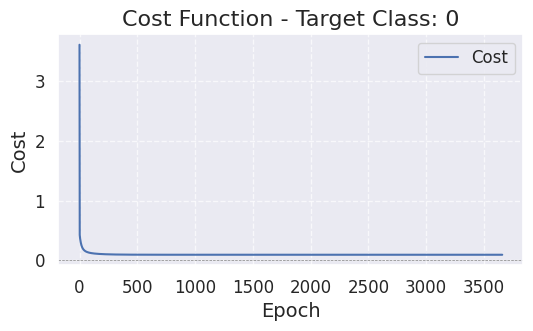


Target Class: 1

Learning Rate : 0.5


Max. Iterations:  : 10000

Final Cost: 0.1622103100985138


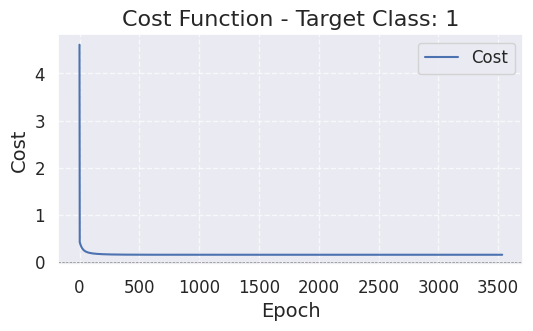


Target Class: 2

Learning Rate : 0.5


Max. Iterations:  : 10000

Final Cost: 0.11855801034260577


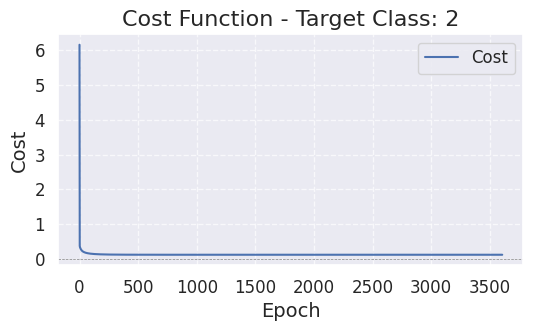


Target Class: 3

Learning Rate : 0.5


Max. Iterations:  : 10000

Final Cost: 0.14437271923159642


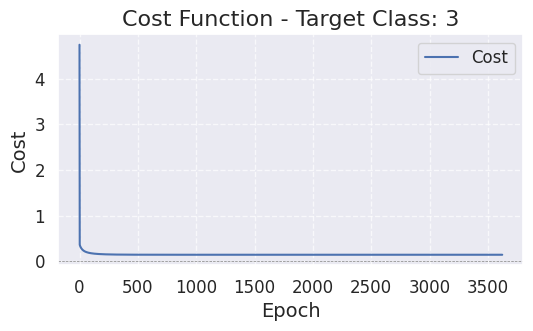


Target Class: 4

Learning Rate : 0.5


Max. Iterations:  : 10000

Final Cost: 0.10424992390085758


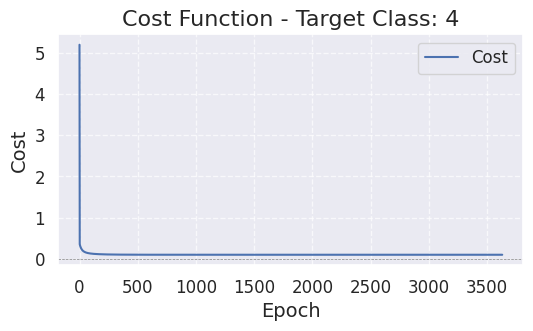


Target Class: 5

Learning Rate : 0.5


Max. Iterations:  : 10000

Final Cost: 0.12181642987157462


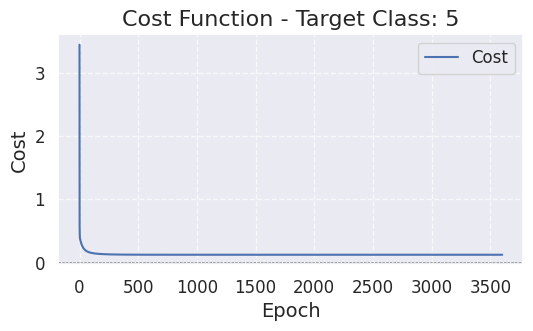


Target Class: 6

Learning Rate : 0.5


Max. Iterations:  : 10000

Final Cost: 0.10414752348421888


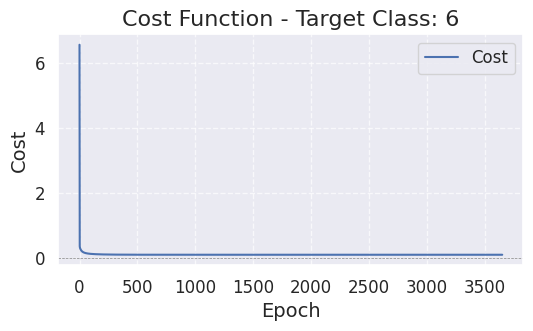


Target Class: 7

Learning Rate : 0.5


Max. Iterations:  : 10000

Final Cost: 0.1083787032710972


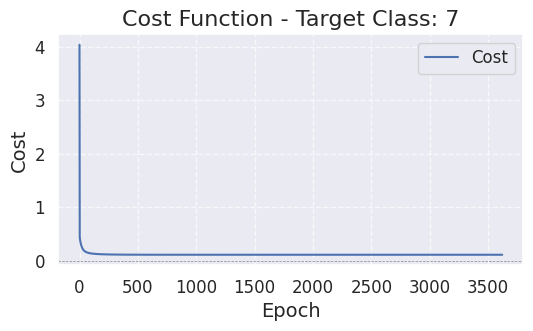


Target Class: 8

Learning Rate : 0.5


Max. Iterations:  : 10000

Final Cost: 0.21332857136712738


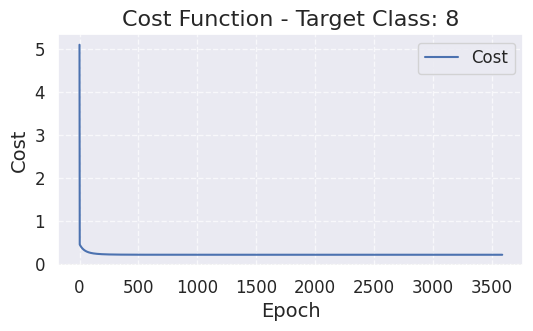


Target Class: 9

Learning Rate : 0.5


Max. Iterations:  : 10000

Final Cost: 0.15631524452366038


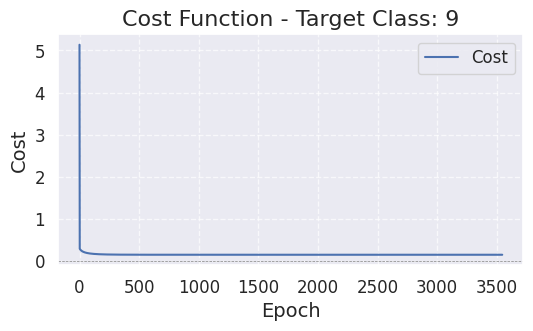

In [93]:
classifiers = multiclass_classifier(0.5, 10, 10000, X_train, y_train, [i for i in range(10)])

Class: 0 -> Probability: 0.03299859257763128
Class: 1 -> Probability: 0.00029381242311005986
Class: 2 -> Probability: 0.02153555175481572
Class: 3 -> Probability: 0.02033270482633368
Class: 4 -> Probability: 0.007701721446622196
Class: 5 -> Probability: 0.7187798868201493
Class: 6 -> Probability: 1.919501346581215e-05
Class: 7 -> Probability: 0.0008077066399502181
Class: 8 -> Probability: 0.00837760547089954
Class: 9 -> Probability: 0.23751173838165826


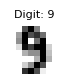

In [58]:
a = 1
sample = X_test[a]
sample = np.hstack((1, sample))

for i, clf in enumerate(classifiers):
  c = np.array(clf["theta"])
  h = h_theta(c, sample)
  print(f"Class: {clf['target']} -> Probability: {h}")

show_number(X_test[a], y_test[a])

In [59]:
def single_entry_classifier(sample, real_result, classifiers, show=False):
    sample = np.hstack((1, sample))
    predictions = []

    for clf in classifiers:
        c = np.array(clf["theta"])
        h = h_theta(c, sample)
        if show:
          print(f"Class: {clf['target']} -> Probability: {h}")
        predictions.append((clf['target'], h))

    # Sort predictions by probability in descending order
    predictions.sort(key=lambda x: x[1], reverse=True)

    # Print the prediction
    predicted_class = predictions[0][0]
    if show:
      print(f"Predicted Class: {predicted_class}")

    # Show the number and the ground truth
    if show:
      show_number(sample[1:], predicted_class)
      print(f"Real Digit: {real_result}")
    return predicted_class

Class: 0 -> Probability: 0.07685901789386294
Class: 1 -> Probability: 0.001915755617416455
Class: 2 -> Probability: 0.010353136123418372
Class: 3 -> Probability: 0.00036921620902414354
Class: 4 -> Probability: 0.03563087836973618
Class: 5 -> Probability: 0.9985983184087436
Class: 6 -> Probability: 0.00012843213270073491
Class: 7 -> Probability: 0.0001683224420829949
Class: 8 -> Probability: 0.003647216378402741
Class: 9 -> Probability: 0.0004849708028304463
Predicted Class: 5


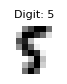

Real Digit: 5


In [60]:
a = 6
predicted_class = single_entry_classifier(X_test[a], y_test[a], classifiers, True)

In [61]:
def evaluate_test_set(classifiers, X_test, y_test):
    correct_predictions = []
    incorrect_predictions = []

    for i, sample in enumerate(X_test):
        for clf in classifiers:
            # Evaluate the input against the current classifier
            predicted_digit = single_entry_classifier(sample, y[i], classifiers)

            # Check if the prediction is correct
            if predicted_digit == y_test[i]:
                correct_predictions.append((sample, y_test[i], predicted_digit))
                break  # Move to the next sample
            else:
                incorrect_predictions.append((sample, y_test[i], predicted_digit))
                break  # Move to the next sample

    # Calculate accuracy
    accuracy = len(correct_predictions) / len(X_test) * 100

    # Display statistics
    print(f"Total Test Samples: {len(X_test)}")
    print(f"Correct Predictions: {len(correct_predictions)}")
    print(f"Incorrect Predictions: {len(incorrect_predictions)}")
    print(f"Accuracy: {accuracy:.2f}%")

    return correct_predictions, incorrect_predictions

In [62]:
# resultados de la clasificación con regresión logística
lcp, licp = evaluate_test_set(classifiers, X_test, y_test)

Total Test Samples: 359
Correct Predictions: 304
Incorrect Predictions: 55
Accuracy: 84.68%



Classifier Results:

Total Predictions: 359
Correct Predictions: 304
Incorrect Predictions: 55
Accuracy: 84.68%



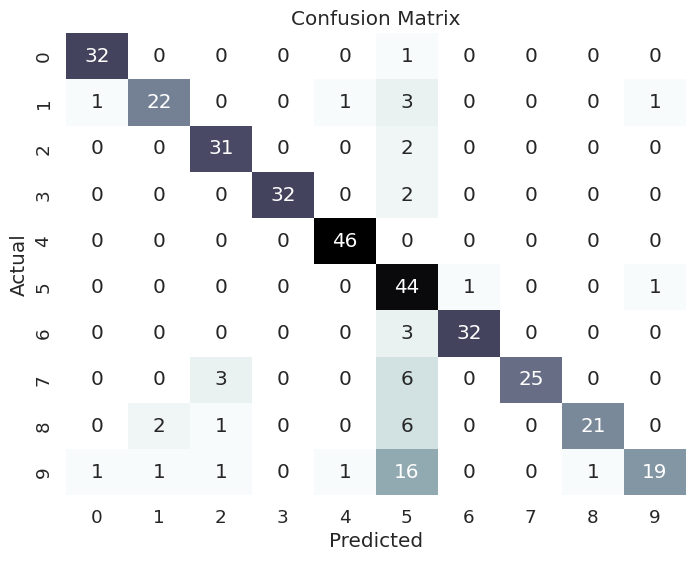

In [73]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def display_classifier_results(correct_predictions, incorrect_predictions, class_names=[i for i in range(10)]):
    total_predictions = len(correct_predictions) + len(incorrect_predictions)
    accuracy = len(correct_predictions) / total_predictions

    print("\nClassifier Results:\n")
    print(f"Total Predictions: {total_predictions}")
    print(f"Correct Predictions: {len(correct_predictions)}")
    print(f"Incorrect Predictions: {len(incorrect_predictions)}")
    print(f"Accuracy: {accuracy:.2%}")
    print("")

    # Create lists for true labels and predicted labels
    true_labels = [int(c[1]) for c in correct_predictions] + [int(c[1]) for c in incorrect_predictions]
    predicted_labels = [int(c[1]) for c in correct_predictions] + [int(c[2]) for c in incorrect_predictions]

    # Calculate the confusion matrix
    cm = confusion_matrix(true_labels, predicted_labels)

    # Display the confusion matrix as a heatmap with class names on both axes
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    ax = sns.heatmap(cm, annot=True, fmt="d", cmap="bone_r", cbar=False,
                     xticklabels=class_names, yticklabels=class_names)
    ax.set_xlabel("Predicciones")
    ax.set_ylabel("Dígitos Reales")
    plt.title("Matriz de Confusión")
    plt.show()

display_classifier_results(lcp, licp)


Podemos observar también, la matriz de confusión. Donde vemos cuales fueron las predicciones realizadas correctamente y las que no, así como los dígitos con los cuales fueron confundidos.

## 5. Pesos de los Parámetros



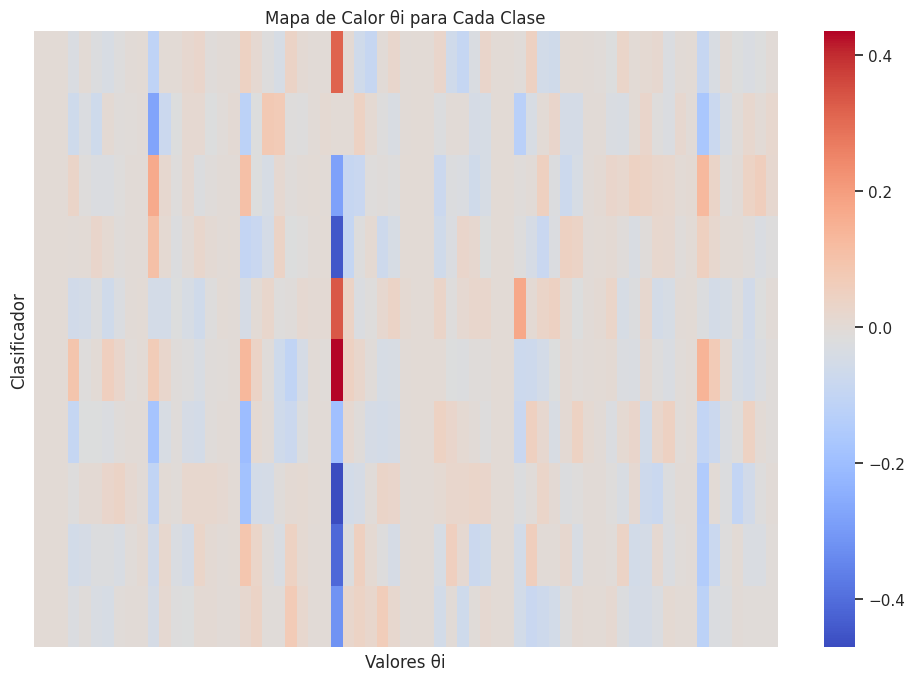

In [125]:

# Preparamos los datos en una matriz donde cada fila corresponde a un clasificador y cada columna a un valor de θi
num_classifiers = len(classifiers)
num_theta_values = len(classifiers[0]['theta'])
theta_matrix = np.zeros((num_classifiers, num_theta_values))

for i, params in enumerate(classifiers):
    theta_matrix[i] = params['theta']

# Crea un mapa de calor para cada clasificador sin etiquetas ni texto
plt.figure(figsize=(12, 8))
sns.heatmap(theta_matrix, annot=False, cmap="coolwarm", xticklabels=False, yticklabels=False)

plt.xlabel("Valores θi")
plt.ylabel("Clasificador")
plt.title("Mapa de Calor θi para Cada Clase")
plt.show()


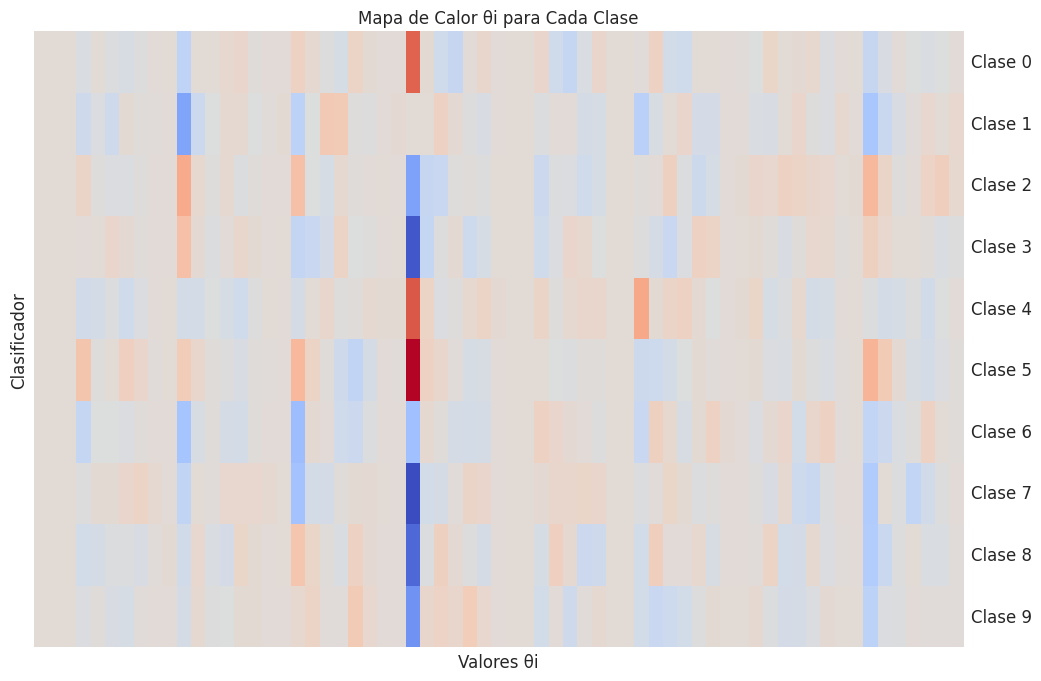

In [127]:
# Crear un mapa de calor para cada clasificador con etiquetas de clase
plt.figure(figsize=(12, 8))
ax = sns.heatmap(theta_matrix, cmap="coolwarm", xticklabels=False, yticklabels=False, cbar=False)

# Obtener las etiquetas de clase de tus clasificadores
class_labels = [params['target'] for params in classifiers]

# Agregar etiquetas de clase junto al mapa de calor
for i, label in enumerate(class_labels):
    ax.text(num_theta_values + 0.5, i + 0.5, f'Clase {label}', ha='left', va='center')

plt.xlabel("Valores θi")
plt.ylabel("Clasificador")
plt.title("Mapa de Calor θi para Cada Clase")
plt.show()


## 6. Clasificador Multinomial

A continuación implementaremos un Clasificador Multinomial haciendo uso completamente de la librería scikit-learn desde el procesamiento de datos hasta la presentación de resultados.

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [95]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [97]:
# Crear y entrenar el clasificador multinomial
classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=100)
classifier.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

En este caso, el parámetro solver especifica el algoritmo que se utilizará para resolver el problema de optimización en la regresión logística. 'lbfgs' (Limited-memory Broyden-Fletcher-Goldfarb-Shanno) es un algoritmo eficiente para problemas de optimización de funciones suaves como la regresión logística. Es una elección común para problemas multiclase, que haría las veces de cuando nosotros usamos Descenso Gradiente.

In [98]:
# Realizar predicciones en el conjunto de prueba
y_pred = classifier.predict(X_test)

In [99]:
# Paso 5: Evaluar el rendimiento del clasificador
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión: {accuracy:.2f}')

Exactitud (Accuracy): 0.97


In [100]:
# Mostrar un reporte de clasificación
print('\nReporte de Clasificación:\n')
print(classification_report(y_test, y_pred))


Reporte de Clasificación:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.94      0.94      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.93      0.95      0.94        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [101]:
# Opcionalmente, puedes mostrar imágenes de ejemplos mal clasificados
misclassified_indices = np.where(y_test != y_pred)[0]

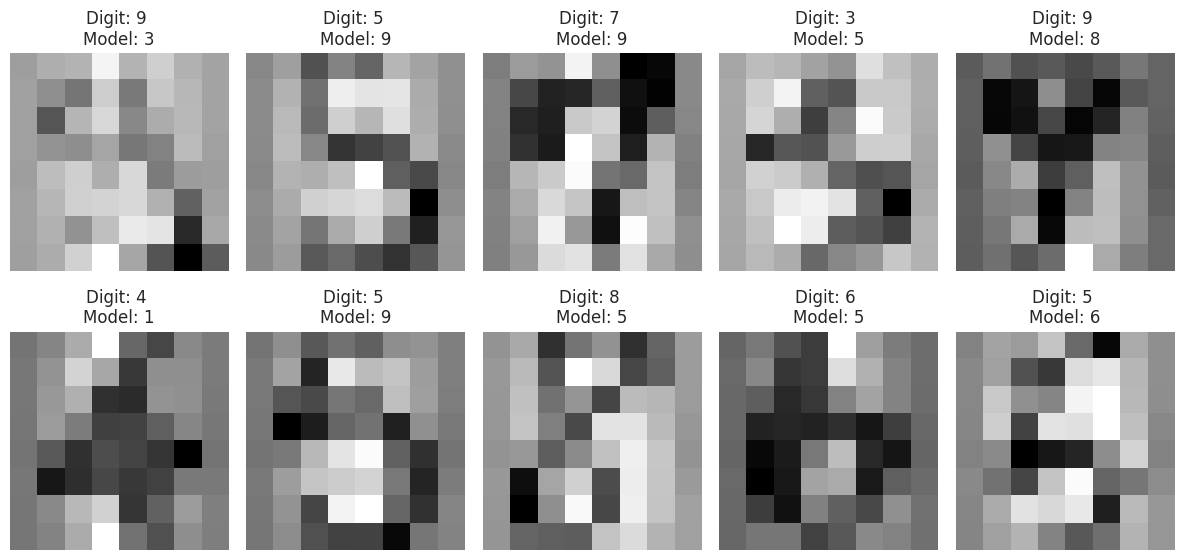

In [113]:
plt.figure(figsize=(12, 6))
for i, index in enumerate(misclassified_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[index].reshape(8, 8), cmap='binary', vmin=min(X_test[index]), vmax=max(X_test[index]))
    plt.title(f'Digit: {y_test[index]} \nModel: {y_pred[index]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


## 7. Comparación de Resultados

**KNN (Implementación Propia):**
- Desarrollamos nuestra propia implementación de KNN y la probamos exhaustivamente.
- A pesar de ser la opción más lenta, obtuvimos resultados prometedores en la clasificación de dígitos.
- Experimentamos con diversas métricas de distancia, como Manhattan, Minkowski, Euclidiana y Chebyshev, para encontrar la más adecuada.
- Luego de explorar nuestra propia implementación, decidimos considerar la versión de KNN proporcionada por scikit-learn.

**KNN (Scikit-learn):**
- Utilizamos la implementación de KNN de scikit-learn, que es altamente optimizada y eficiente.
- Esta versión nos permitió entrenar y evaluar modelos de manera más rápida y eficaz que nuestra implementación personal.
- Pudimos ajustar hiperparámetros como el número de vecinos (`n_neighbors`) y las métricas de distancia según nuestras necesidades.
- Observamos que la versión de scikit-learn ofrecía un rendimiento similar al de nuestra implementación personal, pero con una velocidad significativamente mayor.

**Regresión Logística:**
- Experimentamos con la regresión logística, un modelo de clasificación lineal.
- Ajustamos hiperparámetros como la tasa de aprendizaje $\eta$ y la regularización $\gamma$ para mejorar el rendimiento.
- Sin embargo, notamos que la regresión logística tiende a confundir con frecuencia los dígitos 5, lo que sugiere que es menos eficaz en la distinción de esa clase específica.
- A pesar de tener muchos parámetros y hiperparámetros, la regresión logística resultó ser menos costosa en términos de entrenamiento en comparación con otros algoritmos más complejos.

**Regresión Multinomial:**
- Implementamos la regresión multinomial, que es una extensión de la regresión logística para problemas de clasificación multiclase.
- Este modelo es adecuado para tareas de clasificación con más de dos clases, como nuestro conjunto de datos de dígitos.
- La regresión multinomial ajusta múltiples modelos de regresión logística, uno para cada clase.
- Los parámetros de clasificación se determinan mediante una función de softmax, que asigna probabilidades a cada clase.
- Experimentamos con diferentes hiperparámetros como `solver` y `max_iter` para ajustar el modelo.
- Con la regresión multinomial, esperábamos obtener un rendimiento más equilibrado entre las clases en comparación con la regresión logística.
- En general, se ibtuvo mejores resultados debido a la complejidad de superficies de decisión que esta regresión puede generar, que son más complejas que un plano o hiperplano.

En resumen, como equipo, exploramos varios algoritmos de clasificación, ajustando sus hiperparámetros y métricas para encontrar la mejor configuración en función de nuestro conjunto de datos. Cada modelo tiene sus ventajas y desventajas, y la elección del modelo adecuado depende de las características y los objetivos de nuestro problema específico.


## Conclusiones

Como el objetivo es evaluar nuestros conocimientos en clasificación, responderemos las siguientes preguntas:

**1. ¿Qué influencia tiene el uso de diferentes valores de K en el clasificador KNN?**

Para el algoritmo de KNN, el valor de la salida de nuestro dato dependerá exlusivamente de los valores cercanos a este. La cantidad de valores cercanos que consideremos (vecinos) es de vital importancia ya que determinará directamente la influencia que tengan los datos ya existentes a la hora de clasificar un nuevo dato. En nuestros experimentos realizados, pudimos observar que en general la precisión varía con mucha volatilidad a l ahora d eincrementar los valores de K, pero se puede apreciar claramente que a medida los valores de K aumentan, la precisión se ve mermada ligeramente. Esto se debe a que mientras más veicnos consideremos, se "suavizan" las decisiones que se toman ya que considera mayor cantidad de vecinos, y hace al algoritmo menos sensible a los datos atípicos y más sensible a patrones locales.

Pudimos observar que los valores muy bajos de $k$ hacían un sobreajuste en los datos, y que son estos valores los que generan mayor precisión con respecto a los datos de prueba. Por el contrario, al aumentar los valores de $k$, el modelo quedaba subajustado, ya que al considerar más vecinos podemos incluso a tener empates de voto entre varias clases y eso puede llegar a ocasionar predicciones erróneas dependiendo de como hemos programado la toma de decisiones (en nuestro caso, si había empates se escoge uno al azar).

**2. ¿Qué diferencias hay entre el clasificador utilizando KNN y regresión logística? ¿Funciona uno mejor que otro?, ¿Porqué?**

En general, pudimos identificar muchas diferencias entre ambos métodos.

**En el Aprendizaje**: KNN es un algoritmo que no "aprende" de la manera en la que habíamos trabajado anteriores algoritmos de clasificación, sino que guarda todas las instancias de entrenamiento y las usa cada vez que se quiere clasificar una observación. Por el contrario, la Regresión Logística tiene un proceso de entrenamiento computacionalmente costoso al inicio, que aprende un modelo lineal para generar una superficie de decisión entre las clases con parámetros que se utilizarán en conjunto con las variables de entrada, y como resultado da un número que se puede interpretar como una probabilidad a que dicha observación pertenezca a una clase.

**En el Modelo**: KNN no proporciona información muy significativa en cuando a un modelo de ML se refiere, ya que la salida del algoritmo es unicamente una mayoría de votos que representa la clase mayoritaria en las regiones aledañas de nuestra observación en su correspondiente espacio, mientras que la Regresión Logística aprende una serie de parámetros que cuantifican el aporte de cada variable para así poder tomar una decisión.

**En el Costo Computacional:** KNN (por lo menos, en su implementación más básica) es un algoritmo muy computacionalmente costoso, ya que para hacer cada clasificación, calcula la distancia (con la métrica especificada) de la observación con cada uno de los datos de entrenamiento. Esta es una operación que es demasiado exhaustiva y por eso se han hecho implementaciones que optimicen este proceso por medio de estructuras de árboles más complejas (como la implementación que trae ScikitLearn). Por el contrario, el costo computacional de Regresión Logística solo lo encontramos de manera exhaustiva al inicio, en el aprendizaje d elos parámetros. Luego de eso solo es evaluar los parámaetros de cada clasificador y hacer una decisión, que es relativmente mucho más liviano que estar calculando las distancias entre cada dato y la nueva observación.

**En los hiperparámetros**: El algorotimo de KNN se puede ajustar para aceptar distintas medidas de distancias entre observaciones, y cada una obtiene resultados distintos. También se puede variar la cnatidad de vecinos a tomar en cuenta, que puede directamente generear sobreajustes o subajustes con solo variar dichos parámetros. En Regresión Logsítica, se pueden variar aún muchas más cosas que pueden genera rmodelos completamente distintos, desde la función de costo, la regularización, la taza de aprendizaje, las iteraciones a tomar en cuenta, etc.

**En el rendimiento**: En nuestro experimentos, KNN resultó ser mucho más preciso qué Regresión Logsítica, pero esta es una cuestión que se explorará en la siguient epregunta.


**3. ¿El clasificador de regresión logistica presenta un buen rendimiento? ¿Cómo evaluan su rendimiento?¿Si el rendimiento no es bueno que cree se debe hacer para mejorarlo?**

En nuestros experimentos, Regresión Logística obtuvo resultados aceptables, más no obtuvo resultados tan buenos como KNN. Esto se puede deber a muchas razones. Como habíamos mencionado anteriormente, KNN es mucho más exacto ya que directamente busca cuales son las observaciones más parecidas, y su exactitud puede variar mucho dependiendo de los datos de entrenamiento recibidos y ser muy sensible a estos, por ejemplo, si hay muchos dígitos $5$ que parecen $6$, ese será un patrón local que fácilmente puede influir en la clasificación de nuevas observaciones.

Mientras que, para Regresión Logsítica, se calculan múltiples aproximaciones de parámetros, para luego introducirlos en una función que nos arroja un resultado interpretable como una probabilidad a que la observación pertenezca a una clase. Estos parámetros no son tan sensibles a los datos atípicos, y miden la influencia de cada variable para hacer decisiones. Estos parámetros se calculan de una manera relativamente compleja a lo que hace KNN, ya que se minimiza una función, que tiene en cuentra hiperparámetros como la constante d eregularización, la taza de aprendizaje, el número de iteraciones máximo, etc.

Para mejorar el rendimiento, podríamos varias estos parámetros hasta encontrar unbalance entre el costo computacional y la precisión que deseamos, así como estudiar cuáles son las predicciones que el modelo hace mal para poder tal vez redistribuir los datos, ponderarlos de alguna manera o alterar las observaciones de entrenamiento para que no se guarden esos patrones equivocados. También podemos estudiar distintas métricas, como la matriz de confusión y estudiar cuales son los errores que más se cometen. Podemos observar en nuestro modelo, que la confusión más frecuente es decir que algunos dígitos $5$ son $9$, y en general, existe mucha confusión alrededor de esos dígitos.

**4. Al realizar el mapa de calor con los pesos de la regresión logística, para los diferentes clasificadores, ¿Qué puede notar? ¿Hay algun tipo de patrón?, ¿Sí, no, porqué?**

Estos mapas de calor resaltan que ciertos dígitos son más distinguibles para ciertos clasificadores, lo que indica especialización en la identificación de dígitos específicos. Además, la diferencia en los pesos asignados a la misma característica entre clasificadores sugiere que cada clasificador aprende de manera única y prioriza las características de manera diferente. Además, la no linealidad de los modelos de ponderación muestra que la relación entre las características visuales y las clases de dígitos es compleja y no necesariamente lineal. Esto puede significar que tal vez necesitamos superficies de decisión más complejas que solo un plano o hiperplano para hacer nuestrs decisiones.


**5. ¿Qué puede concluir al final de este proyecto?, escriba su opinión frente a los metodos de clasificación y como se aplicó en este proyecto.**

Al final de este proyecto, hemos llegado a algunas conclusiones valiosas. Primero, sabemos que elegir un método de clasificación apropiado depende en gran medida de las características de los datos y del problema en cuestión. En nuestro proyecto, observamos que K-Nearest Neighbors (KNN) con métricas personalizadas e implementación automatizada tuvo un buen desempeño a pesar de ser más lento, lo que resalta la importancia de explorar diferentes métricas para obtener mejores resultados. Además, el uso de la biblioteca scikit-learn ha simplificado significativamente la implementación de KNN y ha ayudado a aumentar la eficiencia computacional. Sin embargo, tuvimos dificultades para aplicar la regresión logística debido a su dependencia de hiperparámetros y  entre algunos dígitos (llegando a tener incluso solo un 14 % de precisión en algunos experimentos). Finalmente, al utilizar la regresión logística multinomial, apreciamos cómo esta técnica puede capturar patrones complejos en los datos y ofrecer resultados sólidos.

En resumen, este proyecto nos ayudó a comprender mejor la clasificación de datos y nos enseñó la importancia de explorar, seleccionar y adaptar métodos según el contexto del problema.

# Regresión Lineal: Datos artificiales

En el archivo .csv adjunto se encuentra una base de datos creada artificialmente, donde la salida es una funcion de dos variables, es decir $y^{(i)} = f\left(x_1^{(i)},x_2^{(i)}\right)+\eta^{(i)}$, donde $\eta$ respresenta el error de medición. El objetivo de este problema es que resulvan este problema de regresión lineal utilizando lso conocimientos obtenidos en clase.



# 1. Carga de los datos.

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D  # Importa la herramienta 3D
from ipywidgets import interact, FloatSlider

data = pd.read_csv('https://drive.google.com/uc?export=download&id=16ak77xpA5so1FXdSCr8aOTLVPnROhRzq')
data.shape
# Observando los datos
data.head(10)

,X1,X2,y
0,53.766714,1.347397,0.594013
1,183.388501,-1.338226,0.505659
2,-225.884686,-0.800645,0.253316
3,86.217332,-1.343605,0.453381
4,31.876524,1.151258,1.720519
5,-130.768830,-1.556187,0.434455
6,-43.359202,-2.127122,1.032279
7,34.262447,1.105957,1.780675
8,357.839694,-0.846858,0.610009
9,276.943703,0.723174,-0.058932


## 2. Análisis Descriptivo de los Datos

In [117]:
data.describe()

,X1,X2,y
count,1000.000000,1000.000000,1000.000000
mean,-3.263196,0.073797,0.996858
std,99.896532,1.997194,0.791569
min,-323.203780,-6.144331,-0.650879
25%,-71.263595,-1.240731,0.331548
50%,-3.043251,0.099402,0.947372
75%,61.056271,1.347746,1.649241
max,357.839694,7.139736,3.325075


#### Para ver los datos desde distintas perspectivas
El slider Data es para ver en 3D o desde las perspectivas 2D mientras que Elevación y Azimut solo son para mover la perspectiva 3D.

In [118]:
@interact(eje=FloatSlider(value=1, min=1, max=3, step=1, description='Data:'),
          elev=FloatSlider(value=30, min=-90, max=90, step=5, description='Elevación:'),
          azim=FloatSlider(value=30, min=-180, max=180, step=5, description='Azimut:'))
def todo(eje, elev, azim):
    fig = plt.figure()
    if eje == 1:
        ax = fig.add_subplot(111, projection='3d')  # Crea un subplot 3D
        ax.scatter(data['X2'], data['X1'], data['y'], marker='o', s=30)
        ax.set_xlabel('Data X1')
        ax.set_ylabel('Data X2')
        ax.set_zlabel('Data y')
        ax.view_init(elev=elev, azim=azim)  # Ajusta la elevación y el azimut
        plt.title('Datos en 3D')
    elif eje == 2:
        plt.scatter(data['X1'], data['y'], marker='o', s=30)
        plt.xlabel('Data X1')
        plt.ylabel('Data y')
        plt.title('Datos en Altura')
    else:
        plt.scatter(data['X2'], data['y'], marker='o', s=30)
        plt.xlabel('Data X2')
        plt.ylabel('Data y')
        plt.title('Datos en Altura')

    plt.show()


interactive(children=(FloatSlider(value=1.0, description='Data:', max=3.0, min=1.0, step=1.0), FloatSlider(val…

In [119]:
def extract_and_normalize_column(data, column_name):
    if column_name in data.columns:
        column = data[column_name]
        normalized_column = (column - column.mean()) / column.std()
        return normalized_column
    else:
        raise ValueError(f"La columna '{column_name}' no existe en el DataFrame.")


# Data frame norm
data_x1_norm = extract_and_normalize_column(data, 'X1')
data_x2_norm = extract_and_normalize_column(data, 'X2')
data_y_norm  = extract_and_normalize_column(data, 'y')
data_norm    = pd.DataFrame({    'X1': data_x1_norm,'X2': data_x2_norm,'y': data_y_norm})
data=data_norm

#### Para ver los datos normalizados desde distintas perspectivas
El slider Data es para ver en 3D o desde las perspectivas 2D mientras que Elevación y Azimut solo son para mover la perspectiva 3D.
Sin embargo no hubo cambios significativos.

In [120]:
@interact(eje=FloatSlider(value=1, min=1, max=3, step=1, description='Data:'),
          elev=FloatSlider(value=30, min=-90, max=90, step=5, description='Elevación:'),
          azim=FloatSlider(value=30, min=-180, max=180, step=5, description='Azimut:'))
def todo(eje, elev, azim):
    fig = plt.figure()
    if eje == 1:
        ax = fig.add_subplot(111, projection='3d')  # Crea un subplot 3D
        ax.scatter(data['X2'], data['X1'], data['y'], marker='o', s=30)
        ax.set_xlabel('Data X1')
        ax.set_ylabel('Data X2')
        ax.set_zlabel('Data y')
        ax.view_init(elev=elev, azim=azim)  # Ajusta la elevación y el azimut
        plt.title('Datos en 3D')
    elif eje == 2:
        plt.scatter(data['X1'], data['y'], marker='o', s=30)
        plt.xlabel('Data X1')
        plt.ylabel('Data y')
        plt.title('Datos en Altura')
    else:
        plt.scatter(data['X2'], data['y'], marker='o', s=30)
        plt.xlabel('Data X2')
        plt.ylabel('Data y')
        plt.title('Datos en Altura')

    plt.show()

interactive(children=(FloatSlider(value=1.0, description='Data:', max=3.0, min=1.0, step=1.0), FloatSlider(val…

## 3. Implementación de un modelo de regresión lineal que se ajuste a los datos proporcionados.

**Modelos:**

1. De acuerdon con lo que se observa previamente parece ser sinusoidal.
2. Parece tener un comportamiento lineal.

interactive(children=(FloatSlider(value=6.0, description='corrimiento:', max=10.0, step=1.0), FloatSlider(valu…

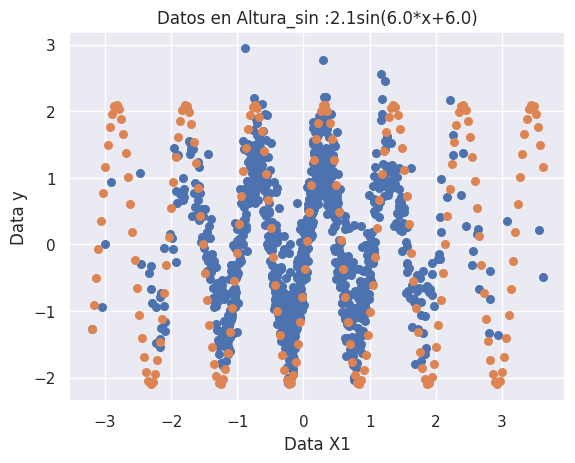

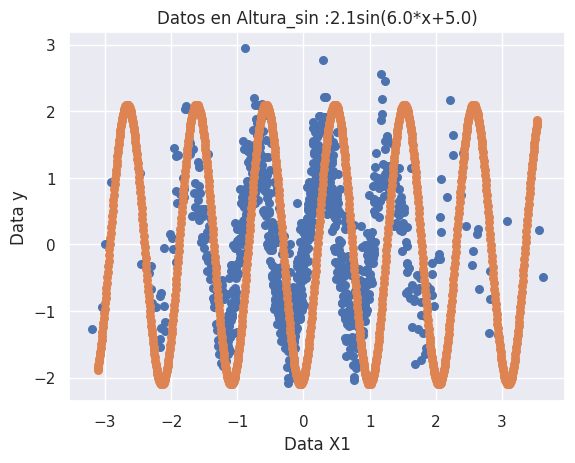

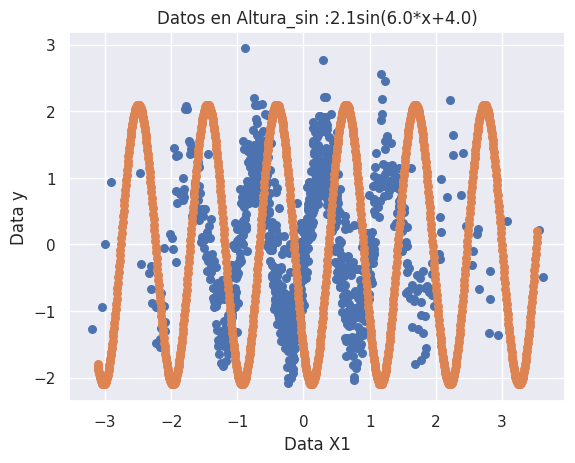

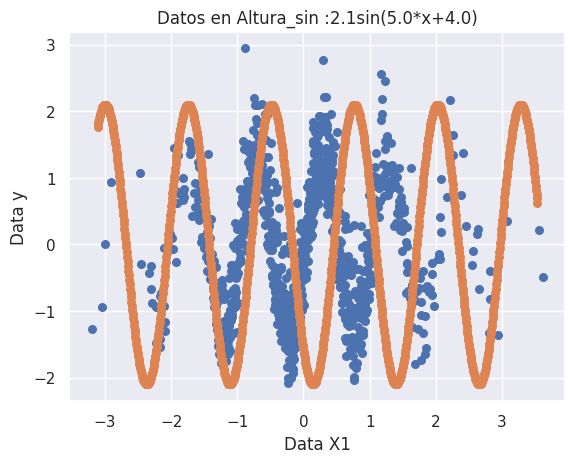

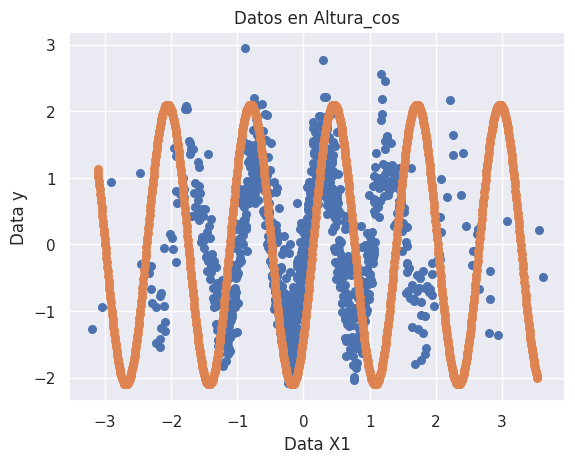

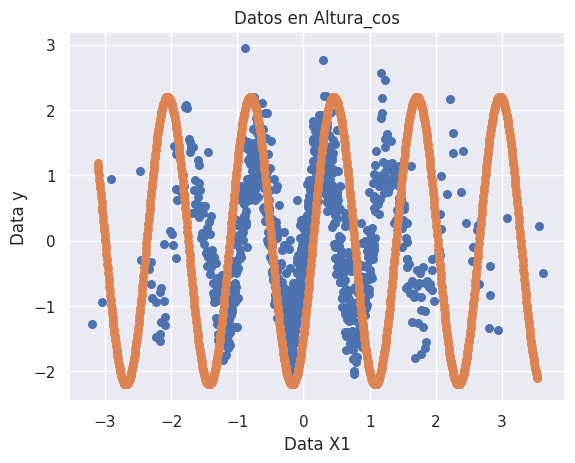

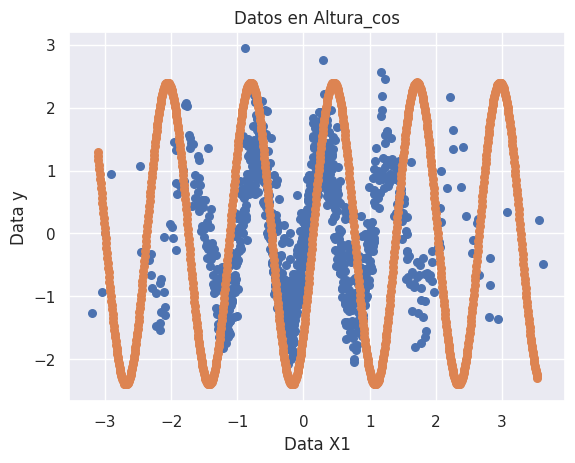

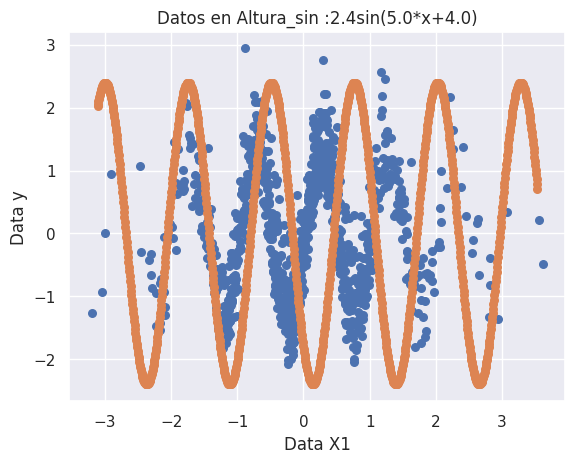

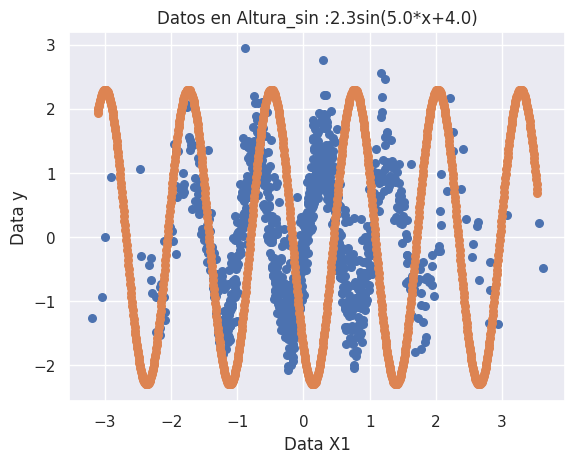

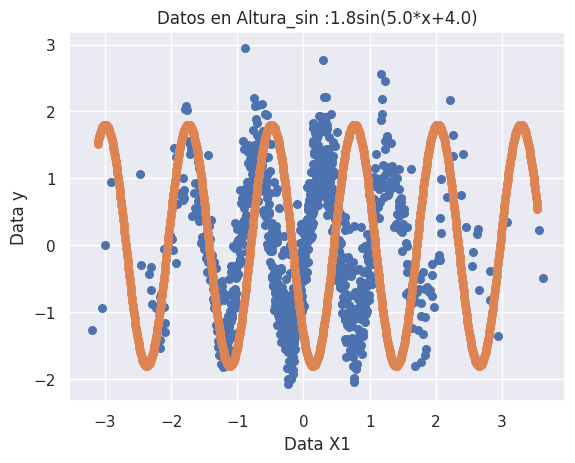

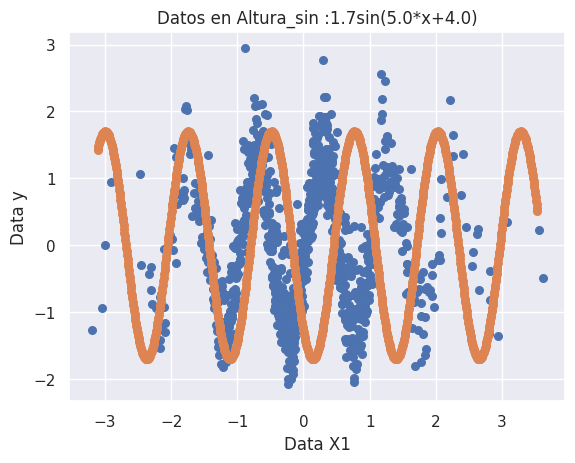

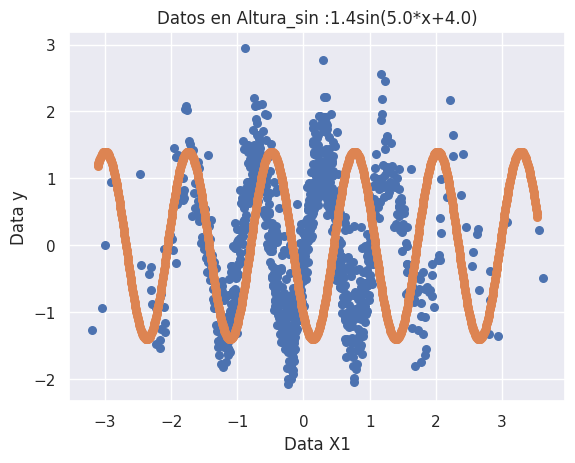

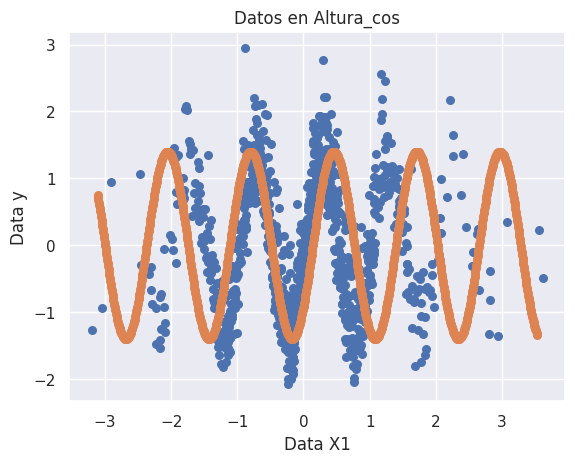

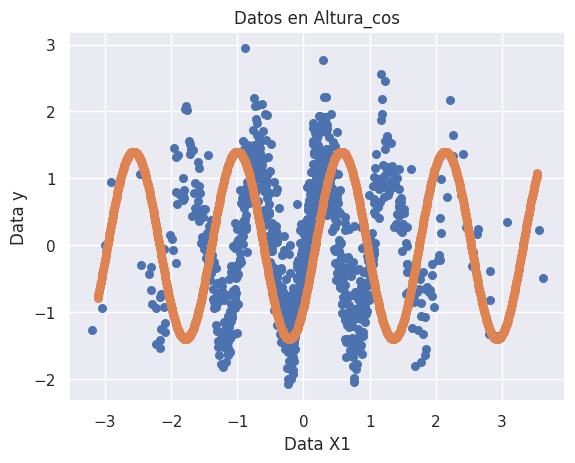

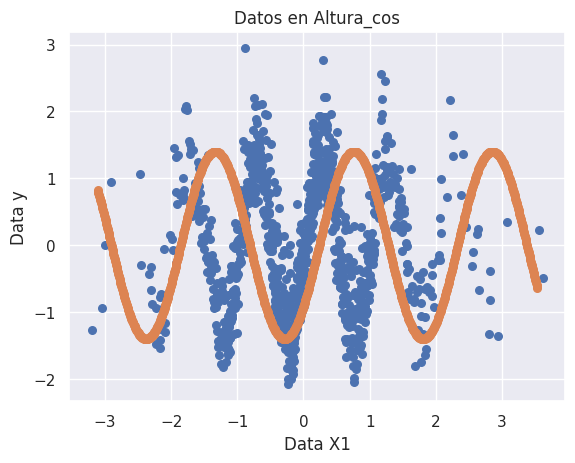

In [121]:
# Valores de x para generar una función sinusoidal
val = np.linspace(min(data['X1']), max(data['X1']), 200)  # Valores de 0 a 2*pi para un ciclo completo
@interact(corrimiento=FloatSlider(value=6, min=0, max=10, step=1, description='corrimiento:'),
          frec=FloatSlider(value=6, min=0, max=7, step=1, description='frec:'),
          Sin_cos=FloatSlider(value=1, min=0, max=1, step=1, description='Sin_cos:'),
          Ampli=FloatSlider(value=2.1, min=1, max=3, step=0.1, description='Ampli:'),)
def grafica_1 (corrimiento,frec,Sin_cos,Ampli):
    plt.scatter(data['X1'], data['y'], marker='o', s=30)
    # Crea un gráfico de dispersión con cos(val) en el eje X y 'y' en el eje Y
    if Sin_cos == 1:
        plt.scatter(val, Ampli*np.sin(frec*val+corrimiento), marker='o', s=30)
        plt.title(f'Datos en Altura_sin :{Ampli}sin({frec}*x+{corrimiento})')
        print((f'sin :{Ampli}np.sin({frec}*x+{corrimiento})'))
    else :
        plt.scatter(val, Ampli*np.cos(frec*val+corrimiento), marker='o', s=30)
        plt.title('Datos en Altura_cos')

    plt.xlabel('Data X1')
    plt.ylabel('Data y')

Text(0.5, 1.0, 'Datos en Altura')

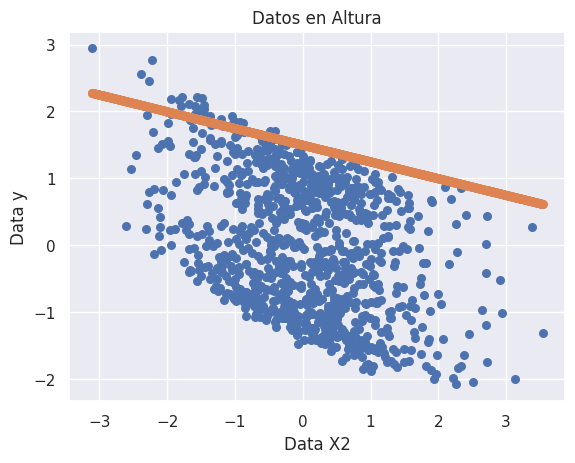

In [122]:
val = np.linspace(min(data['X2']), max(data['X2']), data.shape[0])  # Valores de 0 a 2*pi para un ciclo completo
plt.scatter(data['X2'], data['y'], marker='o', s=30)
plt.scatter(val, -(1/4)*val+1.5, marker='o', s=30)
plt.xlabel('Data X2')
plt.ylabel('Data y')
plt.title('Datos en Altura')

## 4. Graficación de los datos originales, y los obtenidos por el modelo de regresión que ustedes implementarón.


En este caso, se usó gradiente desenciente, en la primera grafica se observa la convergencia del mismo.
Por otro lado, en las graficas siguientes se ven los resultados del modelo sobre los datos originales siento los primeros naranja y los siguientes azul.

In [124]:

ones = np.ones((len(data),1))
def funcion_theta_𝑗(h, thetas, y, aprendizaje=0.05, A=np.column_stack((ones*2,ones))):
    dJ = funcion_3_1_Gradiente(h, thetas, y, A)
    nuevo_theta = thetas - aprendizaje * dJ
    return nuevo_theta
def funcion_3_1_Gradiente(h, thetas, y, A):
    e = (h - y)
    dJ = (1 / (len(h))) * np.dot(A.T, e)
    return dJ
def funcion_2_Costo(h,theta,y):
    e=y-h# Calcula el vector de errores (diferencia entre las predicciones y los valores reales)
    J = (1 / (2*len(h))) * np.matmul(np.transpose(e), e)# Calcula la función de costo
    return J
def funcion_1_salida_𝐡𝜽(A,theta):
    h = np.matmul(A,theta)
    return h
@interact(aprendizaje=FloatSlider(value=00.12, min=0, max=1.5, step=0.005, description='alfa:'),
          lineal=FloatSlider(value=1, min=0, max=4, step=0.005, description='lineal:'),
         itera=FloatSlider(value=50, min=2, max=100, step=1.0, description='itera:'))
def todo(aprendizaje=0.12,itera=50,lineal=1):
    # Forma 1
        # Normalizar los datos
    x1 = extract_and_normalize_column(data, 'X1')
    x2 = extract_and_normalize_column(data, 'X2')
    #y  = extract_and_normalize_column(data, 'y')
    A  = np.column_stack((-x2+1.5,2.1*np.sin(6.0*x1+6.0),ones))   #con cosas que no sirven
    A  = np.column_stack((x2,np.sin(6.0*x1),ones))                #con lo que si afecto
     # Forma 2
    x  = (data.iloc[:, :-1].values - np.mean(data.iloc[:, :-1].values, axis=0)) / np.std(data.iloc[:, :-1].values, axis=0)
    y  = data.iloc[:, -1].values
    #A  = np.column_stack((-x[:, 1]+1.5,2.1*np.sin(6.0*x[:, 0]+6.0),ones))
    theta=np.random.rand(A.shape[1])

    #plt.scatter(x1,y,alpha=0.4,edgecolor='none')
    #plt.scatter(x[:, 0],y,alpha=0.4,edgecolor='none')

    #plt.scatter(x[:, 0],x1,alpha=0.4,edgecolor='none')
    #plt.scatter(x[:, 1],x2,alpha=0.4,edgecolor='none')


    acumulados=[]
    for i in range(int(itera)):
        h=funcion_1_salida_𝐡𝜽(A,theta)
        #print(h)
        J_Ref=funcion_2_Costo(h,theta,y)
        #print(J_Ref)
        acumulados.append(J_Ref)
        #print(acumulados)
        dJ=funcion_3_1_Gradiente(h,theta,y,A)
        #print(dJ)
        theta = funcion_theta_𝑗(h, theta, y, aprendizaje, A)
        #print(dJ)
    plt.figure()
    plt.plot(acumulados)
    plt.xlabel('Iteración')
    plt.ylabel('Costo ')
    plt.title(f"Costo con aprendizaje de {aprendizaje} iterando {itera} veces")
    plt.show()

    plt.scatter(data['X2'], data['y'],alpha=0.4,edgecolor='none')
    plt.scatter(data['X2'],h,alpha=0.4,edgecolor='none')
    plt.xlabel('X2')
    plt.ylabel('h')
    plt.title(f"Resultados del modelo en X2 con aprendizaje de {aprendizaje} iterando {itera} veces")
    plt.show()

    plt.scatter(data['X1'], data['y'],alpha=0.4,edgecolor='none')
    plt.scatter(data['X1'],h,alpha=0.4,edgecolor='none')
    plt.xlabel('X1')
    plt.ylabel('h')
    plt.title(f"Resultados del modelo en X1 con aprendizaje de {aprendizaje} iterando {itera} veces")
    plt.show()


interactive(children=(FloatSlider(value=0.12, description='alfa:', max=1.5, step=0.005), FloatSlider(value=50.…

## 5. Discusión de los resultados obtenidos.

**1. ¿Cómo evaluarón que la regresión fuera adecuada?**

Puesto que el gradiente convergio, se espera que la funcion de costo sea minima, asi mismo, al graficar los datos tanto en X1 como X1 se observa que el comportamiento dle moselo es similar al de los datos originales.

**2. ¿Realizarón algún tipo de transformación no lineal a los datos de entrada? Si fue así, ¿Qué transformación realizarón y por qué?**

Si, se realizo la transformacion Seno para los datos X1 porque la dsitribucion tenia esta forma.
**3. ¿Considera que los resultados obtenidos son adecuados, o se pueden mejorar?**

Si bien los datos obtenidos son muy adecuados probablemente con metodos màs exaustivos se puedan obtener mejores resultados.

**4. ¿Qué puede concluir al final de este proyecto?, escriba su opinión frente a los metodos de regresión lineal y como se aplicó en este proyecto.**

Dado que este metodo ya se habia contruido para implementarlo en la tarea, el desarrollo de aplicarlo fue sencillo y no requirio mucho tiempo para obtener resultados valiosos.